<a href="https://colab.research.google.com/github/AdelinaBiktimirova/Masterskaya_DA/blob/main/masterskaya_da_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ базы вакансий НН.ru

Цель проекта: Выявить различия в предлагаемых вакансиях для Анатлитиков данных и специалистов по Data Science

Исходные данные: Предоставлено две базы данных о вакансиях специалистов по анализу данных(Data Analysis) и специалистов по машинному обучению (Data Science) за период 2024-03-06 по 2024-04-30

Описание данных:

id  - номер вакансии  
name - название вакансии  
  published_at - дата и время публикации вакансии             
alternate_url - ссылка на вакансию                         
type - тип вакансии (актуальность)    
department - подразделение                                
employer - компания                              
area - город                                    
experience - опыт работы                               
key_skills - ключевые навыки                             
schedule - график работы                                 
employment - тип занятости                              
description - описание вакансии                         
description_lemmatized - описание вакансии сокращенное                   
salary_from - заработная плата от                     
salary_to - заработная плата до                               
salary_bin - заработная плата (вилка)                         
key_skills_from_key_skills_field - ключевые навыки из столбца key_skills
hard_skills_from_description - hard skills (развернутый)             
soft_skills_from_description - soft skills (развернутый)

## 1. Знакмоство с данными


In [ ]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import numpy as np

#Уберем ограничение на количество выводимых столбцов

pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(16, 9)})
# Задаем стиль фона и сетки для будущих графиков
sns.set_style('whitegrid')
# Задаем контекст для размера элементов графика
sns.set_context('paper')
mpl.style.use('ggplot')

In [ ]:
#Загружаем данные с google диска
df_da, df_ds = ( pd.read_excel('/content/drive/MyDrive/Masterskaya_DA_HH/vacancies_da (2).xlsx'),
               pd.read_excel('/content/drive/MyDrive/Masterskaya_DA_HH/vacancies_ds.xlsx'))

In [ ]:
#Получаем даты для анализа
f'Данные за период в данных с {df_da.published_at.min()} по {df_da.published_at.max()}'

'Данные за период в данных с 2024-03-06 08:13:00 по 2024-04-30 12:51:55'

In [ ]:
# получим общую исходную информацию о данных с вакансиями по DA
display(df_da.head()) #первые 5 строк
display(df_da.info()) #основная информация
display('Число дубликатов:', df_da.duplicated().sum()) # количество явных дубликатов
display('Количество пропусков', df_da.isna().sum()) #количество пропусков

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                310 non-null    int64         
 1   name                              310 non-null    object        
 2   published_at                      310 non-null    datetime64[ns]
 3   alternate_url                     310 non-null    object        
 4   type                              310 non-null    object        
 5   employer                          310 non-null    object        
 6   department                        92 non-null     object        
 7   area                              310 non-null    object        
 8   experience                        310 non-null    object        
 9   key_skills                        310 non-null    object        
 10  schedule                          310 non-null    

None

'Число дубликатов:'

0

'Количество пропусков'

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          218
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         282
salary_to                           285
salary_bin                            0
key_skills_from_key_skills_field    123
hard_skills_from_description        198
soft_skills_from_description        224
dtype: int64

In [ ]:
display('Процент пропусков от всего датасета',
        df_da.isna().mean().sort_values(ascending=False)*100)

'Процент пропусков от всего датасета'

salary_to                           91.935484
salary_from                         90.967742
soft_skills_from_description        72.258065
department                          70.322581
hard_skills_from_description        63.870968
key_skills_from_key_skills_field    39.677419
employment                           0.000000
salary_bin                           0.000000
description_lemmatized               0.000000
description                          0.000000
id                                   0.000000
name                                 0.000000
key_skills                           0.000000
experience                           0.000000
area                                 0.000000
employer                             0.000000
type                                 0.000000
alternate_url                        0.000000
published_at                         0.000000
schedule                             0.000000
dtype: float64

In [ ]:
display(df_da.describe())

,id,published_at,salary_from,salary_to
count,3.100000e+02,310,28.000000,25.000000
mean,9.525311e+07,2024-04-10 08:37:02.248387072,163837.500000,250528.000000
min,8.297878e+07,2024-03-06 08:13:00,60000.000000,90000.000000
25%,9.429780e+07,2024-03-28 20:27:22.249999872,117500.000000,150000.000000
50%,9.563857e+07,2024-04-14 11:46:01,150000.000000,218400.000000
75%,9.700819e+07,2024-04-22 18:49:14,187000.000000,300000.000000
max,9.814129e+07,2024-04-30 12:51:55,350000.000000,495550.000000
std,2.342789e+06,NaN,69247.894239,113524.722968


In [ ]:
# получим общую исходную информацию о данных с вакансиями по DS
display(df_ds.head()) #первые 5 строк
display(df_ds.info()) #основная информация
display('Число дубликатов:', df_ds.duplicated().sum()) # количество явных дубликатов
display('Количество пропусков', df_ds.isna().sum()) #количество пропусков

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                662 non-null    int64         
 1   name                              662 non-null    object        
 2   published_at                      662 non-null    datetime64[ns]
 3   alternate_url                     662 non-null    object        
 4   type                              662 non-null    object        
 5   employer                          662 non-null    object        
 6   department                        270 non-null    object        
 7   area                              662 non-null    object        
 8   experience                        662 non-null    object        
 9   key_skills                        662 non-null    object        
 10  schedule                          662 non-null    

None

'Число дубликатов:'

0

'Количество пропусков'

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          392
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         609
salary_to                           606
salary_bin                            0
key_skills_from_key_skills_field    311
hard_skills_from_description        354
soft_skills_from_description        468
dtype: int64

In [ ]:
display('Процент пропусков от всего датасета',
        df_ds.isna().mean().sort_values(ascending=False)*100)

'Процент пропусков от всего датасета'

salary_from                         91.993958
salary_to                           91.540785
soft_skills_from_description        70.694864
department                          59.214502
hard_skills_from_description        53.474320
key_skills_from_key_skills_field    46.978852
employment                           0.000000
salary_bin                           0.000000
description_lemmatized               0.000000
description                          0.000000
id                                   0.000000
name                                 0.000000
key_skills                           0.000000
experience                           0.000000
area                                 0.000000
employer                             0.000000
type                                 0.000000
alternate_url                        0.000000
published_at                         0.000000
schedule                             0.000000
dtype: float64

In [ ]:
display(df_ds.describe())

,id,published_at,salary_from,salary_to
count,6.620000e+02,662,53.000000,56.000000
mean,9.509469e+07,2024-04-06 22:12:30.661631744,166386.792453,265431.250000
min,6.741115e+07,2024-02-29 15:01:35,25000.000000,30000.000000
25%,9.441082e+07,2024-03-26 00:49:45,110000.000000,200000.000000
50%,9.546403e+07,2024-04-09 13:37:07,150000.000000,300000.000000
75%,9.681181e+07,2024-04-22 09:43:16.249999872,200000.000000,350000.000000
max,9.813507e+07,2024-04-30 11:41:03,350000.000000,550000.000000
std,2.610613e+06,NaN,75270.642550,115406.304603


**Вывод по шагу №1**

Было принято решение не объединять данные, так как два датасета не большие, можно рассматривать их по отдельности, для того, чтобы анализ был структурно разложен по шагам.

Исходя из предоставленных данных можно сказать, что дубликаты отсуствуют, а с пропусками дело обстоит сложнее. Во-первых в столбцах salary_to, salary_from самый большой процент пропусков, возможно это связано с тем, что работодатели не заполняют информацию о заработной плате, пропуски в данных столбцах оставим так как есть, потому что это может искажать данные в целом (если заполнять пропуски медианным значением либо средним). Столбец department так же оставим без заполнения, потому что для него у нас не хватает данных, чтобы исключить пропуски.

Пропуски в столбцах soft_skills_from_description, hard_skills_from_description заполним на следующем шаге.

## 2. Предработка данных

Так как главная проблема состоит в работе с текстовым форматом ячеек и выделения hard и soft skills, было принято решение из столбца *key_skills*, в котором нет пропусков, дополнить на основании его столбцы *hard_skills_from_description, soft_skills_from_description*

In [ ]:
#проверяем столбец hard_skills_from_description на его содержимое
df_da['hard_skills_from_description'].value_counts()

hard_skills_from_description
Pandas                   72
confluence               20
Юнит-экономика           11
Pandas, confluence        8
Pandas, Google Sheets     1
Name: count, dtype: int64

In [ ]:
df_ds['hard_skills_from_description'].value_counts()

hard_skills_from_description
Pandas                                208
Юнит-экономика                         35
confluence                             35
Pandas, confluence                     18
Pandas, Юнит-экономика                  9
Pandas, confluence, Юнит-экономика      2
confluence, Юнит-экономика              1
Name: count, dtype: int64

In [ ]:
#проверяем столбец soft_skills_from_description на его содержимое
df_da['soft_skills_from_description'].value_counts()

soft_skills_from_description
Документация                                                                  29
Коммуникация                                                                  18
Коммуникация, Документация                                                    10
Аналитическое мышление                                                         9
Принятие решений                                                               3
Проактивность, Аналитическое мышление                                          3
Документация, Переговоры                                                       2
Коммуникация, Документация, Переговоры                                         2
Проактивность                                                                  2
Креативность                                                                   2
Решение проблем, Принятие решений                                              1
Коммуникация, Документация, Проактивность                                      1

In [ ]:
df_ds['soft_skills_from_description'].value_counts()

soft_skills_from_description
Документация                                                                       88
Коммуникация                                                                       54
Коммуникация, Документация                                                          9
Проактивность                                                                       8
Аналитическое мышление                                                              8
Документация, Аналитическое мышление                                                5
Креативность                                                                        4
Презентация результатов                                                             3
Коммуникация, Документация, Креативность                                            3
Работа в команде, Лидерство, Адаптивность, Принятие решений, Внимание к деталям     3
Коммуникация, Аналитическое мышление                                                1
Принятие решений         

In [ ]:
#Просмотрим все значения столбца key_skills, с которым будем работать, и вручную отберем самые часто повторяющееся skills
df_da['key_skills'].unique()

array(["['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse', 'Математическая статистика', 'Python', 'Анализ временных рядов', 'Поиск аномалий', 'SQL', 'BI']",
       "['DWH', 'Документация', 'Витрины данных', 'Informatica', 'Greenplum', 'Hadoop', 'Teradata', 'SQL', 'Airflow']",
       "['DWH', 'Документация', 'Витрины данных', 'Greenplum', 'Hadoop', 'Teradata', 'SQL', 'Airflow']",
       "['Pandas', 'Анализ данных']",
       "['A/B тесты', 'confluence', 'SQL', 'Python']",
       "['PowerBI', 'BigQuery', 'Tableau', 'ORACLE', 'MS SQL Server', 'Python', 'PostgreSQL', 'DAX', 'SQL', 'Power BI', 'MS Power BI']",
       '[]',
       "['Google Analytics', 'Анализ данных', 'Tableau', 'Яндекс.Метрика', 'Работа с большим объемом информации', 'Python', 'Clickhouse', 'Аналитика', 'SQL', 'Power BI']",
       "['Анализ рисков', 'Анализ данных', 'Оценка рисков', 'Аналитика', 'Сбор и анализ информации', 'Anti-fraud', 'Python', 'Математическая статистика', 'Sas', 'Аналитическое мышление', 'SQL', 'Портфельны

In [ ]:
df_ds['key_skills'].unique()

array(["['IT', 'Разработка поисковых технологий', 'data science', 'Python']",
       "['Оценка рисков', 'Управление рисками', 'MS PowerPoint', 'PD, LGD, EAD', 'Портфельные риски', 'Статистический анализ', 'кредитные риски', 'Математическое моделирование', 'SQL']",
       "['Machine Learning', 'Public Speaking', 'Writing Articles', 'Research', 'Юнит-экономика', 'Information Technology', 'Data Mining', 'Fluent English']",
       "['Machine Learning', 'Public Speaking', 'Презентация результатов', 'Writing Articles', 'Research', 'Юнит-экономика', 'Information Technology', 'Data Mining', 'Fluent English']",
       "['PHP', 'Spark', 'Базы данных', 'Python', 'Elastic Search', 'SCALA', 'TypeScript', 'MySQL', 'ClickHouse', 'SQL']",
       "['Документация', 'R', 'Python', 'Креативность', 'Математический анализ', 'Коммуникация', 'Математическое моделирование', 'SQL']",
       "['Документация', 'Python', 'Big Data', 'ML', 'Математическое моделирование', 'SQL']",
       "['Документация', 'Spark', '

In [ ]:
#Напишем функцию, которая будет заполнять пропуски в hard_skills_from_description для аналитиков данных

import re
# Определение функции process_text
def process_text(text, skills_list, ordered_skills):
    # Создаем регулярное выражение для поиска ключевых навыков и их производных
    skills_regex = '|'.join([re.escape(skill) for skill in ordered_skills])
    # Ищем в тексте все совпадения с регулярным выражением
    found_skills = re.findall(skills_regex, text, re.IGNORECASE)
    # Удаляем дубликаты, сохраняя порядок из ordered_skills
    found_skills_ordered = [skill for skill in ordered_skills if skill in found_skills]
    # Возвращаем найденные навыки, преобразованные в строку через запятую
    return ', '.join(found_skills_ordered) if found_skills_ordered else None

# Список ключевых навыков
key_skills = ['Python', 'SQL', 'Power BI', 'A/B тесты']
# Устанавливаем желаемый порядок навыков
ordered_skills = ['SQL', 'Python', 'Power BI', 'A/B тесты']

# Применяем функцию process_text только к пустым ячейкам в столбце 'hard_skills_from_description'
df_da['hard_skills_from_description'] = df_da.apply(
    lambda row: process_text(row['key_skills'], key_skills, ordered_skills) if pd.isnull(row['hard_skills_from_description']) else row['hard_skills_from_description'],
    axis=1
)

# Проверяем результат
df_da['hard_skills_from_description'].value_counts()

hard_skills_from_description
Pandas                              72
SQL, Python                         40
SQL                                 27
confluence                          20
SQL, Python, Power BI               14
Юнит-экономика                      11
SQL, Power BI                       10
Pandas, confluence                   8
SQL, Python, A/B тесты               5
Python                               4
SQL, Python, Power BI, A/B тесты     1
Pandas, Google Sheets                1
Name: count, dtype: int64

In [ ]:
#Та же функция для датасета с датасентистами

# Определение функции process_text
def process_text(text, skills_list, ordered_skills):
    # Создаем регулярное выражение для поиска ключевых навыков и их производных
    skills_regex = '|'.join([re.escape(skill) for skill in ordered_skills])
    # Ищем в тексте все совпадения с регулярным выражением
    found_skills = re.findall(skills_regex, text, re.IGNORECASE)
    # Удаляем дубликаты, сохраняя порядок из ordered_skills
    found_skills_ordered = [skill for skill in ordered_skills if skill in found_skills]
    # Возвращаем найденные навыки, преобразованные в строку через запятую
    return ', '.join(found_skills_ordered) if found_skills_ordered else None

# Список ключевых навыков
key_skills = ['Machine Learning', 'Python', 'SQL', 'A/B тесты', 'ML']
# Устанавливаем желаемый порядок навыков
ordered_skills = ['Machine Learning', 'Python', 'SQL', 'A/B тесты', 'ML']

# Применяем функцию process_text только к пустым ячейкам в столбце 'hard_skills_from_description'
df_ds['hard_skills_from_description'] = df_ds.apply(
    lambda row: process_text(row['key_skills'], key_skills, ordered_skills) if pd.isnull(row['hard_skills_from_description']) else row['hard_skills_from_description'],
    axis=1
)

# Проверяем результат
df_ds['hard_skills_from_description'].value_counts()

hard_skills_from_description
Pandas                                      208
Python, SQL                                  44
Python                                       36
Юнит-экономика                               35
confluence                                   35
Pandas, confluence                           18
Machine Learning, Python, SQL                16
Machine Learning, Python                     15
SQL                                          14
Python, SQL, ML                              10
Python, ML                                   10
Pandas, Юнит-экономика                        9
Machine Learning, Python, ML                  6
Machine Learning, Python, SQL, ML             6
ML                                            3
SQL, ML                                       2
Machine Learning, ML                          2
SQL, A/B тесты                                2
Pandas, confluence, Юнит-экономика            2
confluence, Юнит-экономика                    1
Machine Lea

In [ ]:
#Функция для soft_skills_from_description для аналитиков данных

# Определение функции process_text
def process_text(text, skills_list, ordered_skills):
    # Создаем регулярное выражение для поиска ключевых навыков и их производных
    skills_regex = '|'.join([re.escape(skill) for skill in ordered_skills])
    # Ищем в тексте все совпадения с регулярным выражением
    found_skills = re.findall(skills_regex, text, re.IGNORECASE)
    # Удаляем дубликаты, сохраняя порядок из ordered_skills
    found_skills_ordered = [skill for skill in ordered_skills if skill in found_skills]
    # Возвращаем найденные навыки, преобразованные в строку через запятую
    return ', '.join(found_skills_ordered) if found_skills_ordered else None

# Список ключевых навыков
key_skills = ['Работа в команде', 'Грамотная речь и письмо', 'Решение проблем','Переговоры', 'Управление командой', 'Коммуникация', 'Аналитический склад ума', 'Стратегическое мышление', 'Организаторские навыки', 'Организаторские навыки','Планирование', 'Корпоративная этика', 'Расстановка приоритетов', 'Деловая коммуникация','Обучение и развитие', 'Управление проектами', 'Критическое мышление' ]
# Устанавливаем желаемый порядок навыков
ordered_skills = ['Работа в команде', 'Грамотная речь и письмо', 'Решение проблем','Переговоры', 'Управление командой', 'Коммуникация', 'Аналитический склад ума', 'Стратегическое мышление', 'Организаторские навыки', 'Организаторские навыки','Планирование', 'Корпоративная этика', 'Расстановка приоритетов', 'Деловая коммуникация','Обучение и развитие', 'Управление проектами', 'Критическое мышление' ]

# Применяем функцию process_text только к пустым ячейкам в столбце 'soft_skills_from_description'
df_da['soft_skills_from_description'] = df_da.apply(
    lambda row: process_text(row['key_skills'], key_skills, ordered_skills) if pd.isnull(row['soft_skills_from_description']) else row['soft_skills_from_description'],
    axis=1
)

# Проверяем результат
df_da['soft_skills_from_description'].value_counts()


soft_skills_from_description
Документация                                                                  29
Коммуникация                                                                  18
Коммуникация, Документация                                                    10
Аналитическое мышление                                                         9
Проактивность, Аналитическое мышление                                          3
Принятие решений                                                               3
Коммуникация, Документация, Переговоры                                         2
Креативность                                                                   2
Проактивность                                                                  2
Работа в команде                                                               2
Документация, Переговоры                                                       2
Работа в команде, Грамотная речь и письмо                                      2

In [ ]:
#Функция для soft_skills_from_description для датасентистов

# Определение функции process_text
def process_text(text, skills_list, ordered_skills):
    # Создаем регулярное выражение для поиска ключевых навыков и их производных
    skills_regex = '|'.join([re.escape(skill) for skill in ordered_skills])
    # Ищем в тексте все совпадения с регулярным выражением
    found_skills = re.findall(skills_regex, text, re.IGNORECASE)
    # Удаляем дубликаты, сохраняя порядок из ordered_skills
    found_skills_ordered = [skill for skill in ordered_skills if skill in found_skills]
    # Возвращаем найденные навыки, преобразованные в строку через запятую
    return ', '.join(found_skills_ordered) if found_skills_ordered else None

# Список ключевых навыков
key_skills = ['Оформление описаний', 'Планирование карьеры', 'Публичные выступления', 'Адаптивность','Работа в команде', 'Грамотная речь и письмо', 'Решение проблем','Переговоры', 'Управление командой', 'Коммуникация', 'Аналитический склад ума', 'Стратегическое мышление', 'Организаторские навыки', 'Организаторские навыки','Планирование', 'Корпоративная этика', 'Расстановка приоритетов', 'Деловая коммуникация','Обучение и развитие', 'Управление проектами', 'Критическое мышление' ]
# Устанавливаем желаемый порядок навыков
ordered_skills = ['Оформление описаний', 'Планирование карьеры', 'Публичные выступления', 'Адаптивность', 'Работа в команде', 'Грамотная речь и письмо', 'Решение проблем','Переговоры', 'Управление командой', 'Коммуникация', 'Аналитический склад ума', 'Стратегическое мышление', 'Организаторские навыки', 'Организаторские навыки','Планирование', 'Корпоративная этика', 'Расстановка приоритетов', 'Деловая коммуникация','Обучение и развитие', 'Управление проектами', 'Критическое мышление' ]

# Предположим, что df - это ваш DataFrame
# Применяем функцию process_text только к пустым ячейкам в столбце 'soft_skills_from_description'
df_ds['soft_skills_from_description'] = df_ds.apply(
    lambda row: process_text(row['key_skills'], key_skills, ordered_skills) if pd.isnull(row['soft_skills_from_description']) else row['soft_skills_from_description'],
    axis=1
)

# Проверяем результат
df_ds['soft_skills_from_description'].value_counts()

soft_skills_from_description
Документация                                                                       88
Коммуникация                                                                       54
Коммуникация, Документация                                                          9
Проактивность                                                                       8
Аналитическое мышление                                                              8
Планирование карьеры, Работа в команде                                              6
Документация, Аналитическое мышление                                                5
Креативность                                                                        4
Презентация результатов                                                             3
Коммуникация, Документация, Креативность                                            3
Управление командой                                                                 3
Работа в команде         

In [ ]:
# Посмотрим насколько изменилось количество пропусков в датасетах
display('Процент пропусков от всего датасета DA',
        df_da.isna().mean().sort_values(ascending=False)*100)
display('Процент пропусков от всего датасета DS',
        df_ds.isna().mean().sort_values(ascending=False)*100)

'Процент пропусков от всего датасета DA'

salary_to                           91.935484
salary_from                         90.967742
department                          70.322581
soft_skills_from_description        70.000000
key_skills_from_key_skills_field    39.677419
hard_skills_from_description        31.290323
employment                           0.000000
salary_bin                           0.000000
description_lemmatized               0.000000
description                          0.000000
id                                   0.000000
name                                 0.000000
key_skills                           0.000000
experience                           0.000000
area                                 0.000000
employer                             0.000000
type                                 0.000000
alternate_url                        0.000000
published_at                         0.000000
schedule                             0.000000
dtype: float64

'Процент пропусков от всего датасета DS'

salary_from                         91.993958
salary_to                           91.540785
soft_skills_from_description        68.126888
department                          59.214502
key_skills_from_key_skills_field    46.978852
hard_skills_from_description        27.794562
employment                           0.000000
salary_bin                           0.000000
description_lemmatized               0.000000
description                          0.000000
id                                   0.000000
name                                 0.000000
key_skills                           0.000000
experience                           0.000000
area                                 0.000000
employer                             0.000000
type                                 0.000000
alternate_url                        0.000000
published_at                         0.000000
schedule                             0.000000
dtype: float64

**Вывод по шагу №2**

С помощью функции в столбцах *soft_skills_from_description, hard_skills_from_description* снизили процент пропусков с 72% до 70% и с 64% до 31% соответственно по DA. По DS: SS - c 71% до 68%, HS - 53% о 27%.
Не во всех описаниях вакансий есть упоминание о soft skills, поэтому заполнение по ним труднее. На данном этапе, заполнили пропуски насколько это представляется возможным.

## 3. Исследовательский анализ данных

In [ ]:
df_da_top_emp = df_da.pivot_table(index='employer', values=['id'], aggfunc='count')\
.sort_values(by='id', ascending=False).head(10)
df_da_top_emp


,id
employer,
СБЕР,67
WILDBERRIES,14
МТС,7
Okko,6
"МАГНИТ, Розничная сеть",6
Центр финансовых технологий,6
«UZUM TECHNOLOGIES».,5
ПСБ (ПАО «Промсвязьбанк»),5
Maxim technology,4


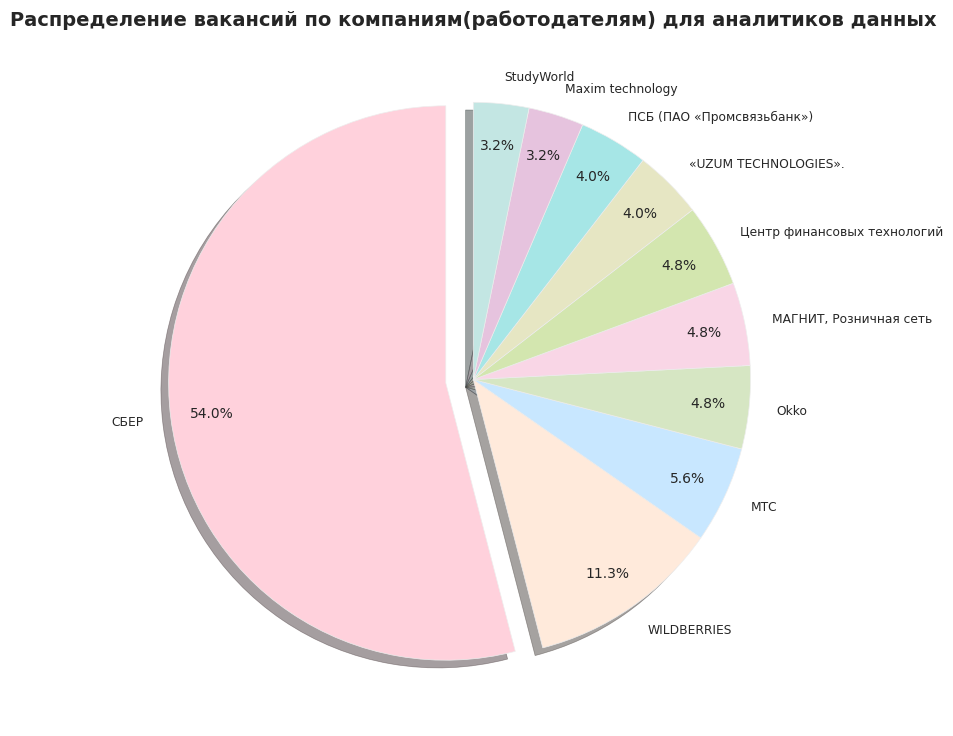

In [ ]:
# Задаем цветовую палитру
colors = ['#ffd1dc', '#ffeadb', '#c8e7ff', '#d6e6c3', '#f9d6e6', '#d3e6af', '#e6e6c3', '#a6e6e6', '#e6c3de', '#c3e6e3']

# Создаем круговую диаграмму для отфильтрованных данных
df_da_top_emp['id'].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=colors,
    shadow=True,
    explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Выделяем первый сектор
)


# Добавляем название и убираем метку оси y для лучшей читаемости
plt.title('Распределение вакансий по компаниям(работодателям) для аналитиков данных', fontsize=14, fontweight='bold')
plt.ylabel('')  # Убираем метку оси y
plt.show()

In [ ]:
df_ds_top_emp = df_ds.pivot_table(index='employer', values=['id'], aggfunc='count')\
.sort_values(by='id', ascending=False).head(10)
df_ds_top_emp

,id
employer,
СБЕР,132
Ozon,20
Газпромбанк,17
Samokat.tech,16
Банк ВТБ (ПАО),12
Lamoda Tech,11
WILDBERRIES,11
Ростелеком,10
билайн,9


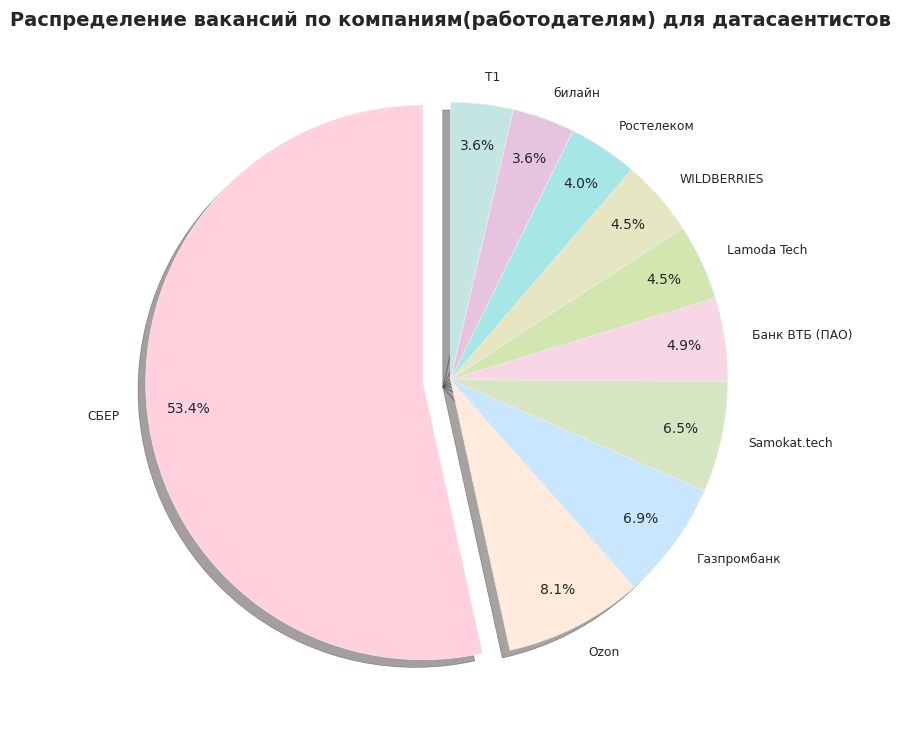

In [ ]:
# Создаем круговую диаграмму для отфильтрованных данных
df_ds_top_emp['id'].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=colors,
    shadow=True,
    explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Выделяем первый сектор
)


# Добавляем название и убираем метку оси y для лучшей читаемости
plt.title('Распределение вакансий по компаниям(работодателям) для датасаентистов', fontsize=14, fontweight='bold')
plt.ylabel('')  # Убираем метку оси y
plt.show()

**Промежуточные выводы**:
По полученным данным можно сказать, что первое место по количеству предлагаемых вакансий среди аналитиков данных и датасаентистам занимает СБЕР. Возможно это связано с расширением сфер деятельности, и расширением штатных единиц. Сбербанк имеет обширную сеть отделений по всей стране, что требует большого количества сотрудников для обеспечения их работы. А также, Сбербанк активно инвестирует в цифровые технологии и развитие новых продуктов, что создает дополнительные рабочие места в сфере IT и цифрового бизнеса. Сбербанк постоянно расширяет спектр своих услуг, включая страхование, инвестиции и технологические сервисы, что также требует новых специалистов.
Далее по аналтиткам данных расположились такие компании как Wildberries и МТС. Тенденция для датасаентистов поменялась, на втором месте так же, как и для DA маркетплейс, но Ozon, на третьем Газпромбанк. Возможно это связано с тем, как компании хотят улучшить свои процессы.

In [ ]:
df_da_10 = df_da.groupby(['employer', 'experience']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index().head(20)

# Сначала получаем список уникальных компаний из топа по количеству записей
top_employers = df_da_10['employer'].unique()

# Теперь фильтруем исходные данные, чтобы оставить только записи для этих компаний
top_employer_data = df_da[df_da['employer'].isin(top_employers)]

# Группируем отфильтрованные данные по компаниям и опыту, агрегируем по количеству и сортируем
grouped_df_da = top_employer_data.groupby(['employer', 'experience']).agg({'id':'count'}).sort_values(by=['employer', 'id'], ascending=[True, False]).reset_index()

# Выводим результат
grouped_df_da

,employer,experience,id
0,Carely,Junior+ (1-3 years),2
1,Carely,Middle (3-6 years),1
2,Finstar Financial Group,Junior+ (1-3 years),3
3,Maxim technology,Middle (3-6 years),4
4,Okko,Junior+ (1-3 years),4
5,Okko,Middle (3-6 years),2
6,StudyWorld,Junior+ (1-3 years),4
7,USETECH,Middle (3-6 years),2
8,Ventra,Junior+ (1-3 years),2
9,WILDBERRIES,Middle (3-6 years),11


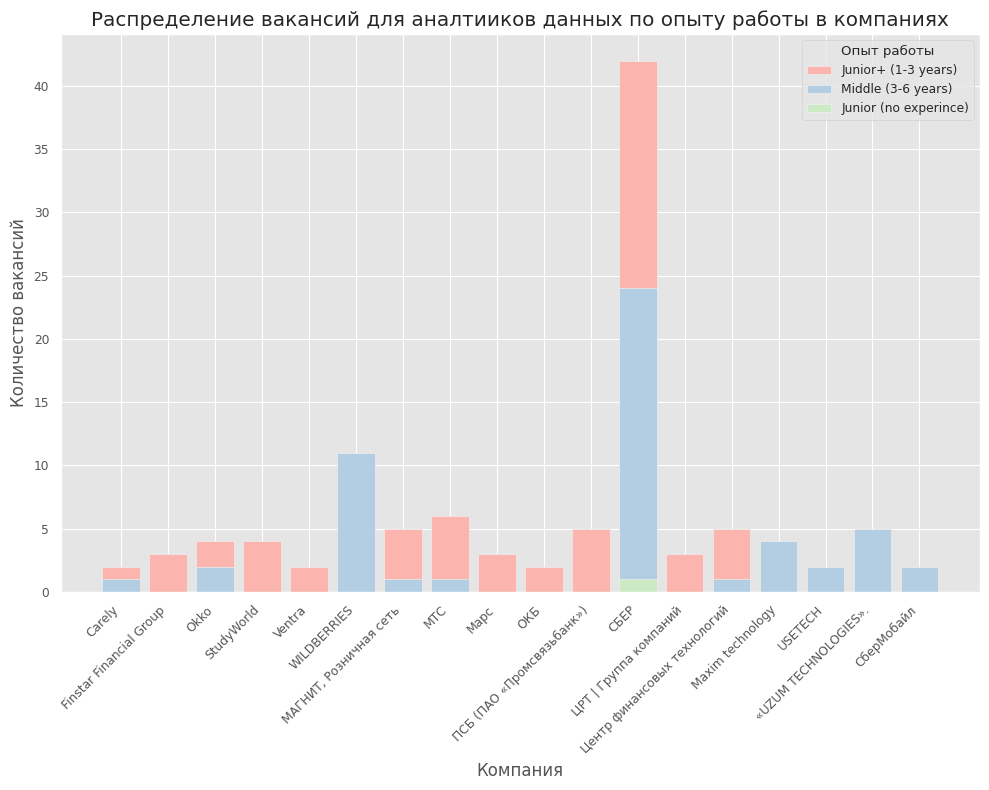

In [ ]:
plt.figure(figsize=(10, 8))

# Генерируем пастельные цвета
colors = plt.cm.Pastel1.colors

# Создаем столбцы для каждого уровня опыта
for i, experience in enumerate(grouped_df_da['experience'].unique()):
    exp_data = grouped_df_da[grouped_df_da['experience'] == experience]
    plt.bar(exp_data['employer'], exp_data['id'], color=colors[i % len(colors)], label=experience)

# Добавляем легенду
plt.legend(title='Опыт работы')

# Добавляем подписи к столбцам
plt.xlabel('Компания')
plt.ylabel('Количество вакансий')
plt.title('Распределение вакансий для аналтииков данных по опыту работы в компаниях')

# Поворачиваем подписи оси X для лучшей читаемости
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:

df_ds_10 = df_ds.groupby(['employer', 'experience']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index().head(20)

# Сначала получаем список уникальных компаний из топа по количеству записей
top_employers_ds = df_ds_10['employer'].unique()

# Теперь фильтруем исходные данные, чтобы оставить только записи для этих компаний
top_employer_df_ds = df_ds[df_ds['employer'].isin(top_employers_ds)]

# Группируем отфильтрованные данные по компаниям и опыту, агрегируем по количеству и сортируем
grouped_df_ds = top_employer_df_ds.groupby(['employer', 'experience']).agg({'id':'count'}).sort_values(by=['employer', 'id'], ascending=[True, False]).reset_index()

# Выводим результат
grouped_df_ds

,employer,experience,id
0,1221Системс,Junior+ (1-3 years),7
1,HeadHunter,Middle (3-6 years),5
2,Lamoda Tech,Middle (3-6 years),9
3,Lamoda Tech,Junior (no experince),2
4,Okko,Middle (3-6 years),5
5,Ozon,Middle (3-6 years),13
6,Ozon,Junior+ (1-3 years),4
7,Ozon,Junior (no experince),3
8,Samokat.tech,Middle (3-6 years),8
9,Samokat.tech,Junior+ (1-3 years),7


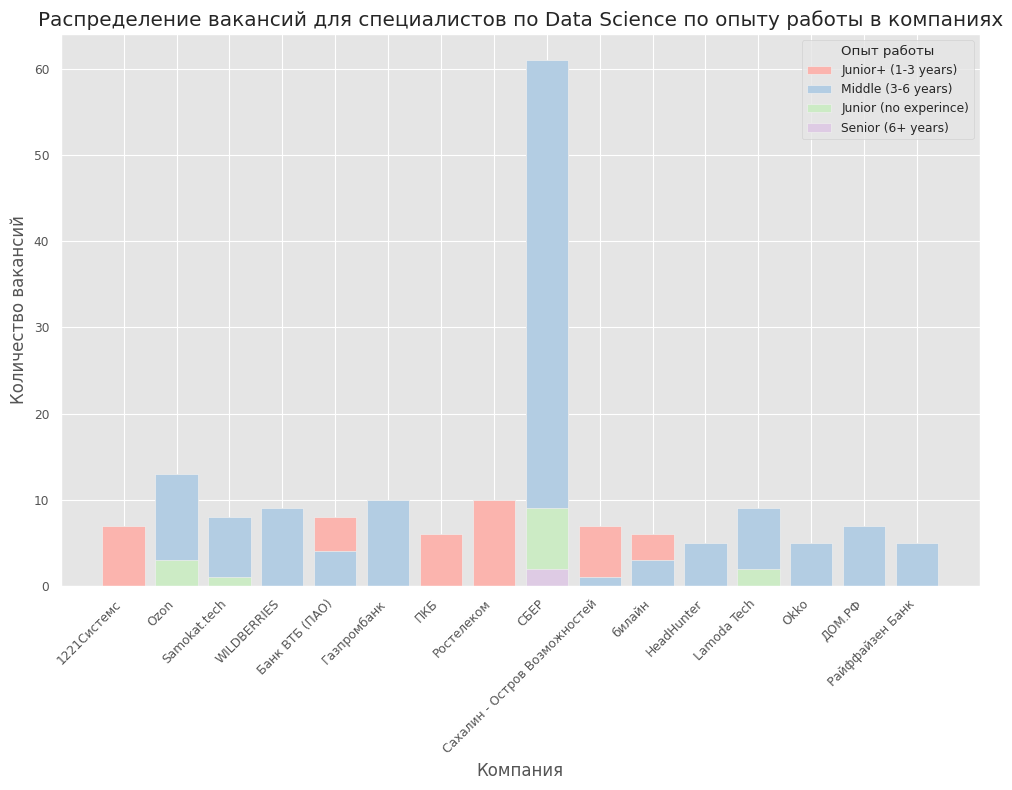

In [ ]:
plt.figure(figsize=(10, 8))

# Генерируем пастельные цвета
colors = plt.cm.Pastel1.colors

# Создаем столбцы для каждого уровня опыта
for i, experience in enumerate(grouped_df_ds['experience'].unique()):
    exp_data = grouped_df_ds[grouped_df_ds['experience'] == experience]
    plt.bar(exp_data['employer'], exp_data['id'], color=colors[i % len(colors)], label=experience)

# Добавляем легенду
plt.legend(title='Опыт работы')

# Добавляем подписи к столбцам
plt.xlabel('Компания')
plt.ylabel('Количество вакансий')
plt.title('Распределение вакансий для специалистов по Data Science по опыту работы в компаниях')

# Поворачиваем подписи оси X для лучшей читаемости
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Промежуточный вывод 2**
По аналтитикам данным: Самое большое количество вакансий для Junior+ (1-3 years), и чуть менее популярное Middle (3-6 years).
По датасаентистам: Тенденция меняется по сравнению с аналитиками, большее количество вакансий для Middle (3-6 years), на втором и третьем месте Junior+ (1-3 years) и Senior (6+ years) соотвественно.
Вероятно это связано со спецификой деятельности и выполняемым фукнциям в этих специальностях.

In [ ]:
da_area = df_da.pivot_table(index='area', values=['id'], aggfunc='count')\
.sort_values(by='id', ascending=False).head(10)
da_area.columns=['Количество вакансий для аналитиков в представленных городах']
da_area

,Количество вакансий для аналитиков в представленных городах
area,
Москва,240
Санкт-Петербург,37
Екатеринбург,6
Новосибирск,4
Краснодар,3
Казань,3
Ростов-на-Дону,3
Самара,2
Владивосток,2


In [ ]:
ds_area = df_ds.pivot_table(index='area', values=['id'], aggfunc='count')\
.sort_values(by='id', ascending=False).head(10)
ds_area.columns=['Количество вакансий для датасентистов в представленных городах']
ds_area

,Количество вакансий для датасентистов в представленных городах
area,
Москва,513
Санкт-Петербург,66
Новосибирск,15
Нижний Новгород,15
Казань,12
Екатеринбург,11
Краснодар,4
Томск,4
Воронеж,3


**Промежуточный вывод 3**
Большее количество вакансий относятся к г.Москва и г.Санкт-Петербург

In [ ]:
da_salary = df_da.pivot_table(index='salary_bin', values=['id'], aggfunc='count')\
.sort_values(by='id', ascending=False).head(10)
da_salary.columns=['Распределение вакансий по аналитикам данных по заработной плате']
da_salary

,Распределение вакансий по аналитикам данных по заработной плате
salary_bin,
ЗП не указана,285
От 200 тысяч до 300 тысяч,11
Больше 300 тысяч,7
От 100 тысяч до 200 тысяч,6
Меньше 100 тысяч,1


In [ ]:
ds_salary = df_ds.pivot_table(index='salary_bin', values=['id'], aggfunc='count')\
.sort_values(by='id', ascending=False).head(10)
ds_salary.columns=['Распределение вакансий по датасаентистам по заработной плате']
ds_salary

,Распределение вакансий по датасаентистам по заработной плате
salary_bin,
ЗП не указана,606
Больше 300 тысяч,29
От 200 тысяч до 300 тысяч,14
От 100 тысяч до 200 тысяч,8
Меньше 100 тысяч,5


In [ ]:
df_da_sal = df_da.groupby(['salary_bin', 'experience']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
df_da_sal

,salary_bin,experience,id
0,ЗП не указана,Junior+ (1-3 years),163
1,ЗП не указана,Middle (3-6 years),110
2,ЗП не указана,Junior (no experince),9
3,От 200 тысяч до 300 тысяч,Junior+ (1-3 years),8
4,Больше 300 тысяч,Middle (3-6 years),7
5,От 100 тысяч до 200 тысяч,Junior+ (1-3 years),6
6,ЗП не указана,Senior (6+ years),3
7,От 200 тысяч до 300 тысяч,Middle (3-6 years),3
8,Меньше 100 тысяч,Junior+ (1-3 years),1


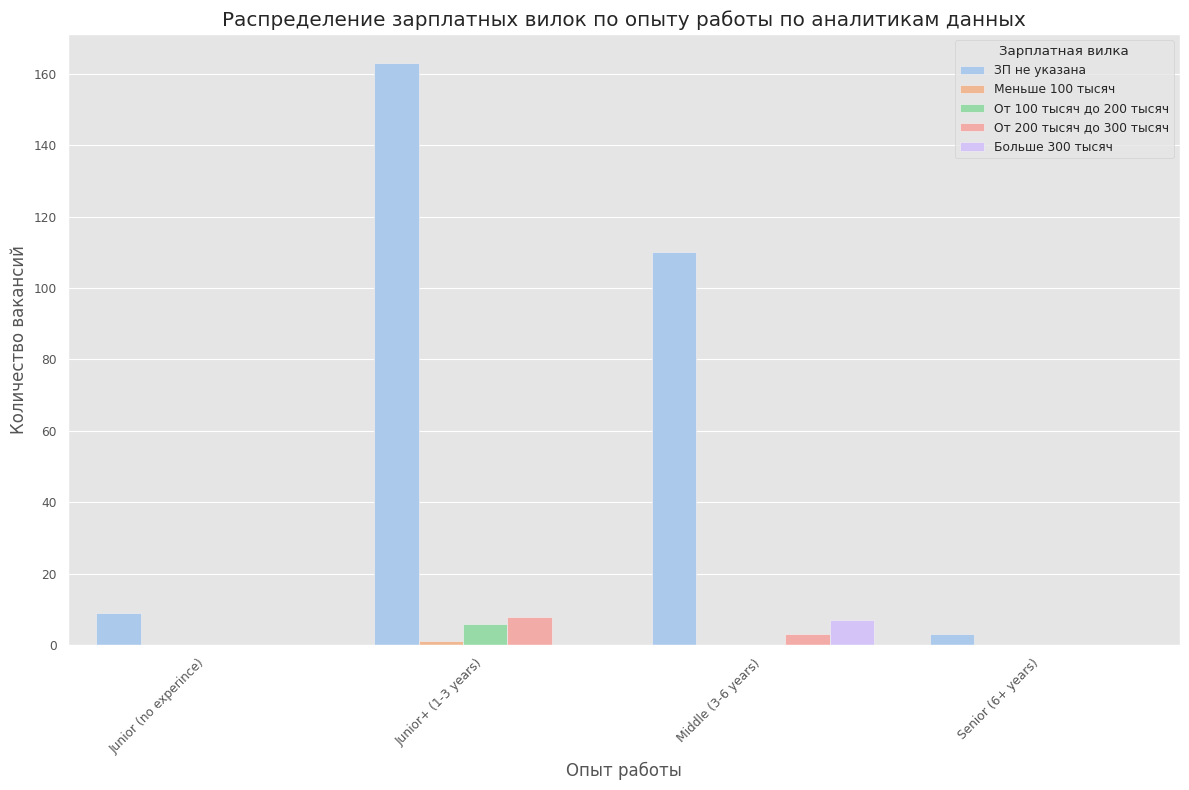

In [ ]:
# Сначала сортируем данные для лучшей визуализации
df_da_sal_sorted = df_da_sal.reset_index().sort_values(by=['experience', 'salary_bin'])

# Создаем график
plt.figure(figsize=(12, 8))
sns.barplot(x='experience', y='id', hue='salary_bin', data=df_da_sal_sorted, palette='pastel')

# Добавляем подписи и заголовок
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.title('Распределение зарплатных вилок по опыту работы по аналитикам данных')
plt.legend(title='Зарплатная вилка')

# Поворачиваем подписи оси X для лучшей читаемости
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
df_ds_sal = df_ds.groupby(['salary_bin', 'experience']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
df_ds_sal

,salary_bin,experience,id
0,ЗП не указана,Middle (3-6 years),300
1,ЗП не указана,Junior+ (1-3 years),261
2,ЗП не указана,Junior (no experince),25
3,ЗП не указана,Senior (6+ years),20
4,Больше 300 тысяч,Middle (3-6 years),14
5,Больше 300 тысяч,Junior+ (1-3 years),13
6,От 200 тысяч до 300 тысяч,Junior+ (1-3 years),7
7,От 200 тысяч до 300 тысяч,Middle (3-6 years),7
8,Меньше 100 тысяч,Junior+ (1-3 years),4
9,От 100 тысяч до 200 тысяч,Junior+ (1-3 years),4


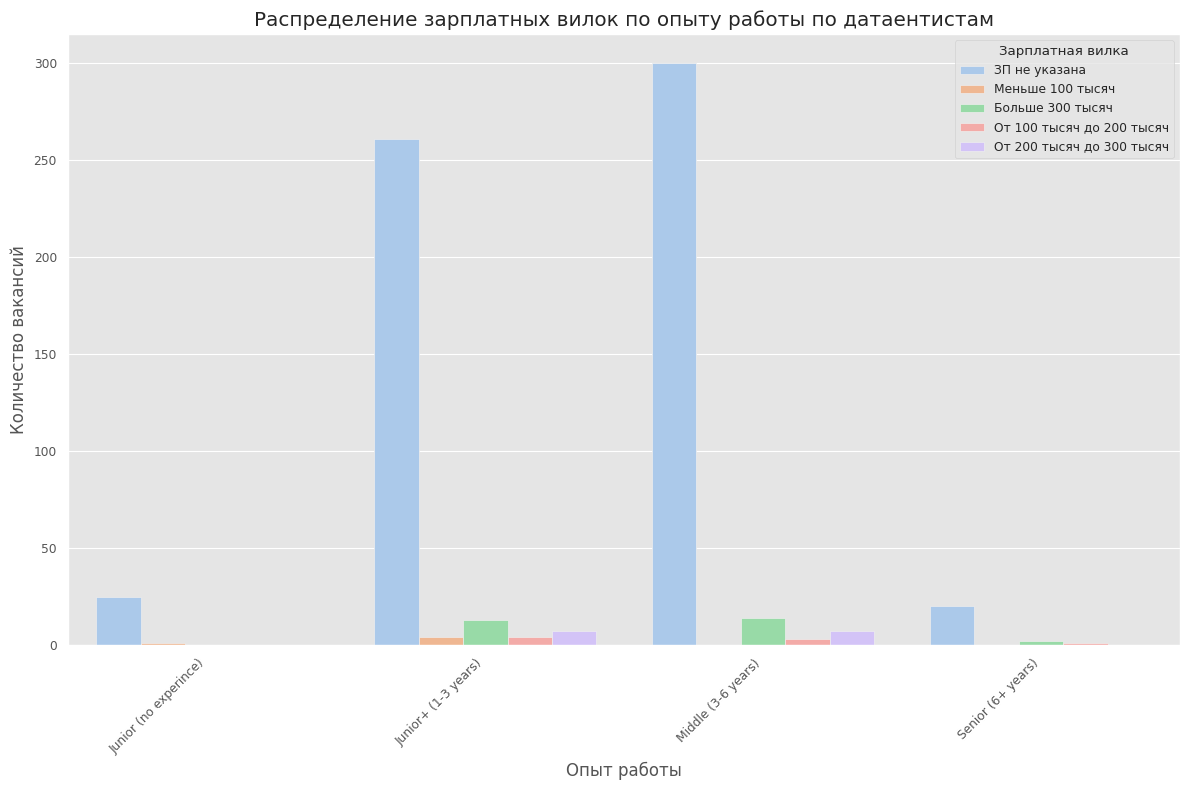

In [ ]:
# Сначала сортируем данные для лучшей визуализации
df_da_sal_sorted = df_ds_sal.reset_index().sort_values(by=['experience', 'salary_bin'])

# Создаем график
plt.figure(figsize=(12, 8))
sns.barplot(x='experience', y='id', hue='salary_bin', data=df_da_sal_sorted, palette='pastel')

# Добавляем подписи и заголовок
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.title('Распределение зарплатных вилок по опыту работы по датаентистам')
plt.legend(title='Зарплатная вилка')

# Поворачиваем подписи оси X для лучшей читаемости
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Промежуточный вывод  4**

Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

In [ ]:
df_da_emp = df_da.groupby(['employment', 'experience']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
df_da_emp

,employment,experience,id
0,Полная занятость,Junior+ (1-3 years),177
1,Полная занятость,Middle (3-6 years),119
2,Полная занятость,Junior (no experince),9
3,Полная занятость,Senior (6+ years),3
4,Частичная занятость,Junior+ (1-3 years),1
5,Частичная занятость,Middle (3-6 years),1


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


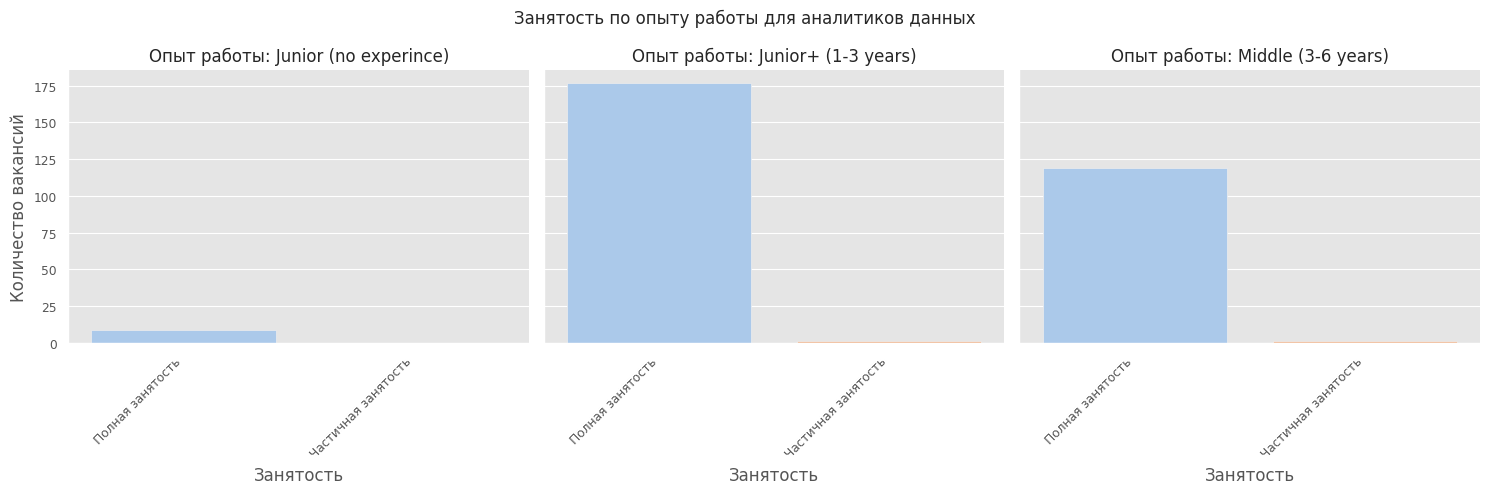

In [ ]:
df_da_emp_sorted = df_da_emp.reset_index().sort_values(by=['experience', 'employment'])

# Создаем объект FacetGrid
g = sns.FacetGrid(df_da_emp_sorted, col='experience', col_order=['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)'], height=5, aspect=1)

# Добавляем столбчатые диаграммы
g.map(sns.barplot, 'employment', 'id', order=['Полная занятость', 'Частичная занятость'], palette='pastel')

# Добавляем подписи и заголовки
g.set_axis_labels('Занятость', 'Количество вакансий')
g.set_titles('Опыт работы: {col_name}')

# Поворачиваем подписи оси X для лучшей читаемости
g.set_xticklabels(rotation=45, ha='right')

# Добавляем общее название для всех графиков
plt.subplots_adjust(top=0.9) # Даем немного места для названия
g.fig.suptitle('Занятость по опыту работы для аналитиков данных')

plt.tight_layout()
plt.show()

In [ ]:
df_ds_emp = df_ds.groupby(['employment', 'experience']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
df_ds_emp

,employment,experience,id
0,Полная занятость,Middle (3-6 years),323
1,Полная занятость,Junior+ (1-3 years),286
2,Полная занятость,Senior (6+ years),23
3,Полная занятость,Junior (no experince),14
4,Стажировка,Junior (no experince),12
5,Проектная работа,Junior+ (1-3 years),2
6,Частичная занятость,Junior+ (1-3 years),1
7,Частичная занятость,Middle (3-6 years),1


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


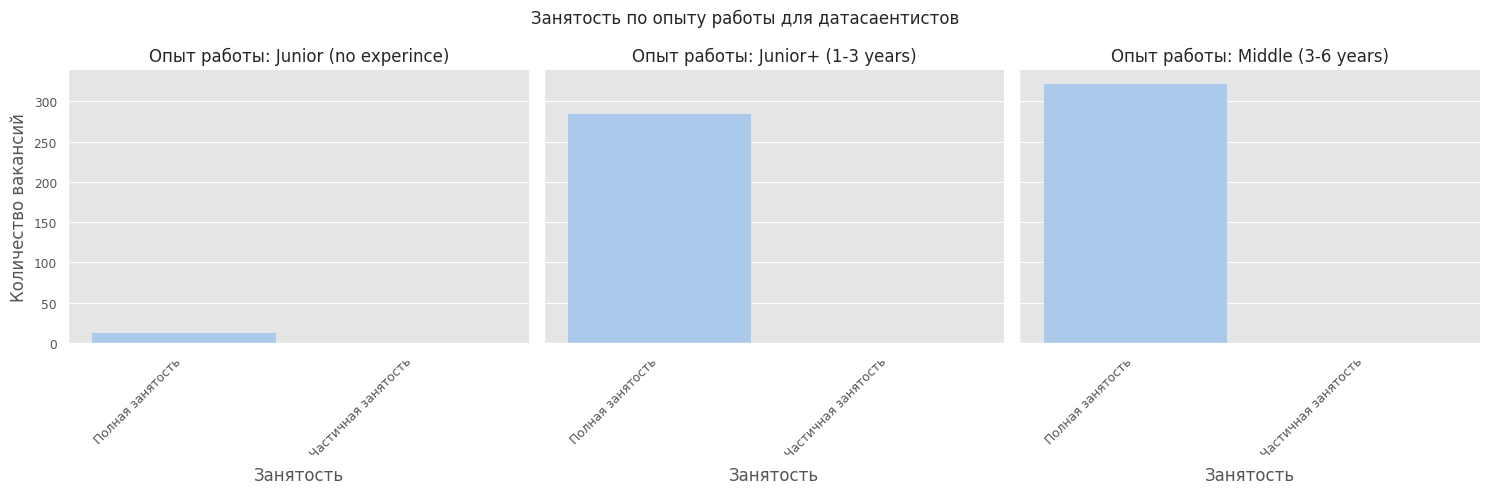

In [ ]:
df_ds_emp_sorted = df_ds_emp.reset_index().sort_values(by=['experience', 'employment'])

# Создаем объект FacetGrid
g = sns.FacetGrid(df_ds_emp_sorted, col='experience', col_order=['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)'], height=5, aspect=1)

# Добавляем столбчатые диаграммы
g.map(sns.barplot, 'employment', 'id', order=['Полная занятость', 'Частичная занятость'], palette='pastel')

# Добавляем подписи и заголовки
g.set_axis_labels('Занятость', 'Количество вакансий')
g.set_titles('Опыт работы: {col_name}')

# Поворачиваем подписи оси X для лучшей читаемости
g.set_xticklabels(rotation=45, ha='right')

# Добавляем общее название для всех графиков
plt.subplots_adjust(top=0.9) # Даем немного места для названия
g.fig.suptitle('Занятость по опыту работы для датасаентистов')

plt.tight_layout()
plt.show()

**Промежуточный вывод 5**

В основном вакансии для обеих специальностей предполагают полную занятость.

In [ ]:
df_da_schedule = df_da.groupby(['schedule', 'experience']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
df_da_schedule

,schedule,experience,id
0,Полный день,Junior+ (1-3 years),135
1,Полный день,Middle (3-6 years),91
2,Удаленная работа,Junior+ (1-3 years),35
3,Удаленная работа,Middle (3-6 years),27
4,Полный день,Junior (no experince),8
5,Гибкий график,Junior+ (1-3 years),5
6,Сменный график,Junior+ (1-3 years),3
7,Гибкий график,Middle (3-6 years),2
8,Полный день,Senior (6+ years),2
9,Сменный график,Junior (no experince),1


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

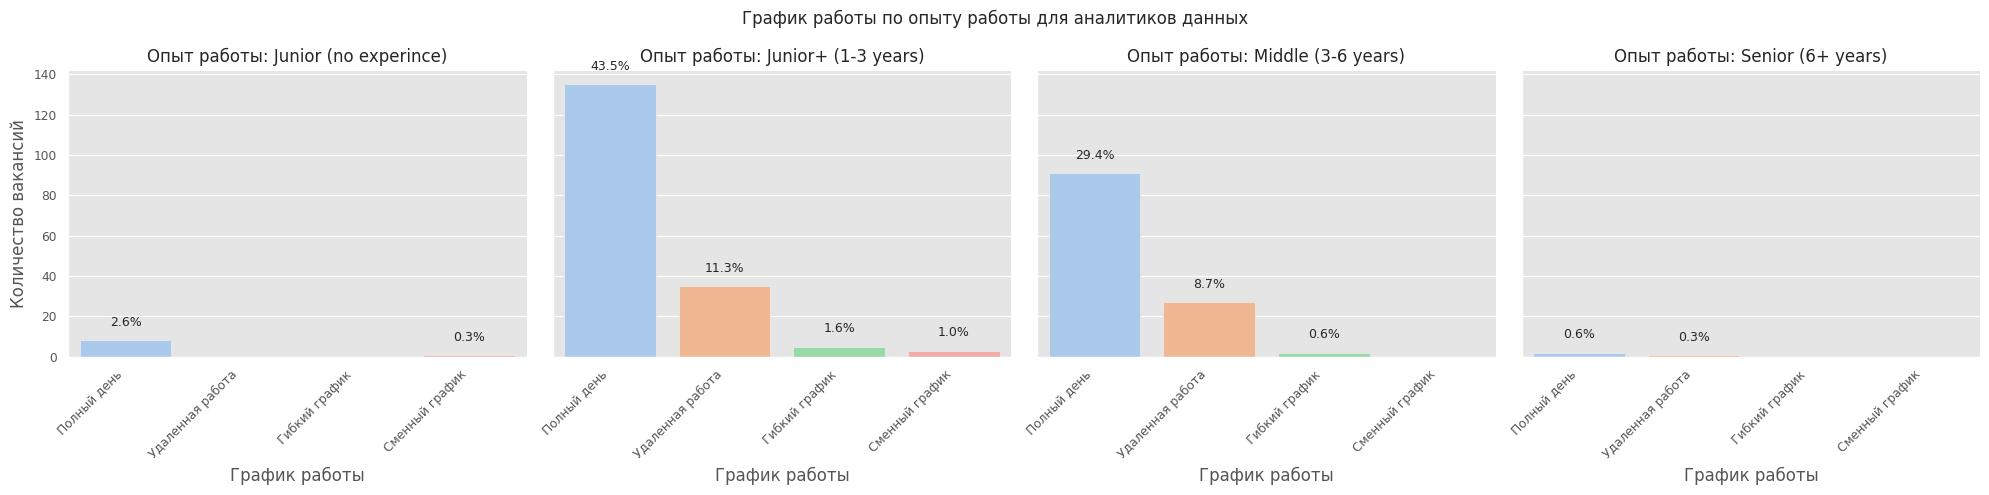

In [ ]:
df_da_emp_sorted = df_da_schedule.reset_index().sort_values(by=['experience', 'schedule'])
# Создаем объект FacetGrid
g = sns.FacetGrid(df_da_emp_sorted, col='experience', col_order=['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)'], height=5, aspect=1)

# Добавляем столбчатые диаграммы
bars = g.map(sns.barplot, 'schedule', 'id', order=['Полный день', 'Удаленная работа', 'Гибкий график', 'Сменный график'], palette='pastel')

# Добавляем аннотации
for ax in g.axes.flat:
    for bar in ax.patches:
        # Рассчитываем процентное значение для каждого столбца
        percentage = f'{100 * bar.get_height() / df_da_emp_sorted["id"].sum():.1f}%'

        # Добавляем аннотацию
        ax.annotate(percentage,
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom',
                    size=9, xytext=(0, 8),
                    textcoords='offset points')

# Добавляем подписи и заголовки
g.set_axis_labels('График работы', 'Количество вакансий')
g.set_titles('Опыт работы: {col_name}')

# Поворачиваем подписи оси X
g.set_xticklabels(rotation=45, ha='right')

# Добавляем общее название
plt.subplots_adjust(top=0.9)
g.fig.suptitle('График работы по опыту работы для аналитиков данных')

plt.tight_layout()
plt.show()

In [ ]:
df_ds_schedule = df_ds.groupby(['schedule', 'experience']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
df_ds_schedule

,schedule,experience,id
0,Полный день,Middle (3-6 years),256
1,Полный день,Junior+ (1-3 years),217
2,Удаленная работа,Junior+ (1-3 years),63
3,Удаленная работа,Middle (3-6 years),50
4,Полный день,Junior (no experince),19
5,Гибкий график,Middle (3-6 years),17
6,Полный день,Senior (6+ years),16
7,Гибкий график,Junior+ (1-3 years),8
8,Гибкий график,Junior (no experince),5
9,Удаленная работа,Senior (6+ years),4


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

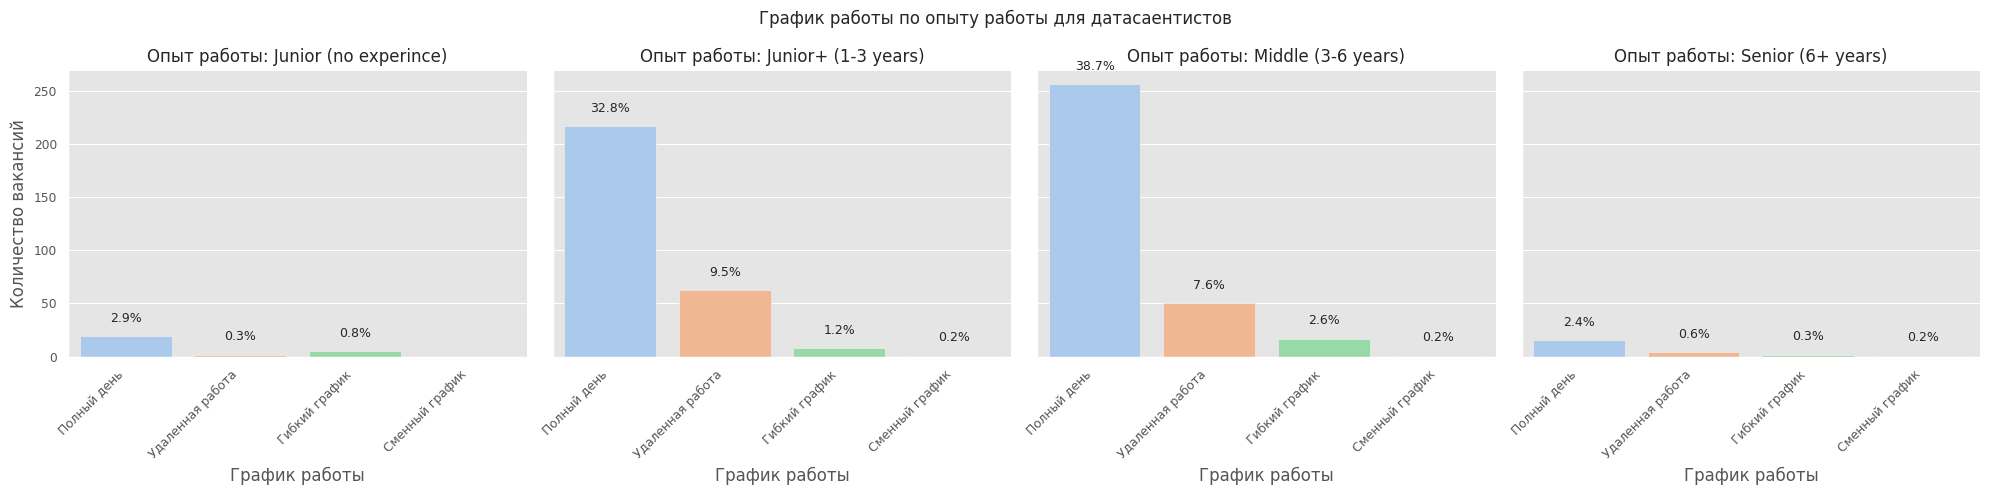

In [ ]:
df_ds_emp_sorted = df_ds_schedule.reset_index().sort_values(by=['experience', 'schedule'])

# Создаем объект FacetGrid
g = sns.FacetGrid(df_ds_emp_sorted, col='experience', col_order=['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)'], height=5, aspect=1)

# Добавляем столбчатые диаграммы
bars = g.map(sns.barplot, 'schedule', 'id', order=['Полный день', 'Удаленная работа', 'Гибкий график', 'Сменный график'], palette='pastel')

# Добавляем аннотации
for ax in g.axes.flat:
    for bar in ax.patches:
        # Рассчитываем процентное значение для каждого столбца
        percentage = f'{100 * bar.get_height() / df_ds_emp_sorted["id"].sum():.1f}%'

        # Добавляем аннотацию
        ax.annotate(percentage,
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom',
                    size=9, xytext=(0, 8),
                    textcoords='offset points')

# Добавляем подписи и заголовки
g.set_axis_labels('График работы', 'Количество вакансий')
g.set_titles('Опыт работы: {col_name}')

# Поворачиваем подписи оси X
g.set_xticklabels(rotation=45, ha='right')

# Добавляем общее название
plt.subplots_adjust(top=0.9)
g.fig.suptitle('График работы по опыту работы для датасаентистов')

plt.tight_layout()
plt.show()

**Промежуточный вывод**

По обеим специальностям в основном график работы предполагает полный день (в офисе), но есть и доля вакансий с удаленной работой, в основном для специалистов по Data Science.

In [ ]:
da_experience  = df_da.pivot_table(index='experience', values=['id'], aggfunc='count')\
.sort_values(by='id', ascending=False)
da_experience.columns=['Требуемый опыт для работы аналитика данных']
da_experience

,Требуемый опыт для работы аналитика данных
experience,
Junior+ (1-3 years),178
Middle (3-6 years),120
Junior (no experince),9
Senior (6+ years),3


<ipython-input-46-c37bb258622d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=da_experience.index, y='Требуемый опыт для работы аналитика данных', data=da_experience, palette='pastel')
<ipython-input-46-c37bb258622d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)


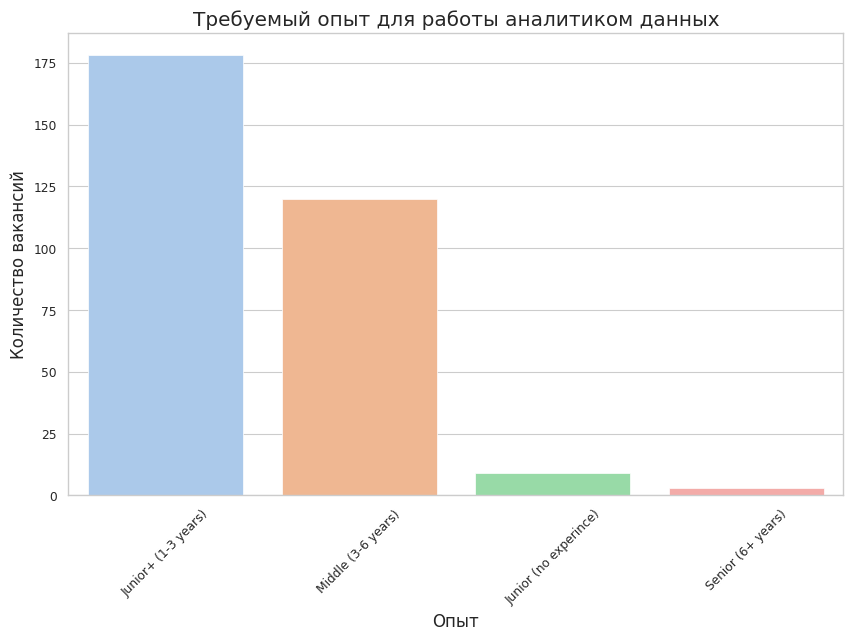

In [ ]:
sns.set_style('whitegrid')

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=da_experience.index, y='Требуемый опыт для работы аналитика данных', data=da_experience, palette='pastel')

# Добавляем подписи к осям и заголовок
plt.xlabel('Опыт')
plt.ylabel('Количество вакансий')
plt.title('Требуемый опыт для работы аналитиком данных')

# Поворачиваем подписи оси x для лучшей читаемости
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

# Отображаем график
plt.show()

In [ ]:
ds_experience  = df_ds.pivot_table(index='experience', values=['id'], aggfunc='count')\
.sort_values(by='id', ascending=False)
ds_experience.columns=['Требуемый опыт для работы датасаентистом']
ds_experience

,Требуемый опыт для работы датасаентистом
experience,
Middle (3-6 years),324
Junior+ (1-3 years),289
Junior (no experince),26
Senior (6+ years),23


<ipython-input-48-d4cb4b971921>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=da_experience.index, y='Требуемый опыт для работы датасаентистом', data=ds_experience, palette='pastel')
<ipython-input-48-d4cb4b971921>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)


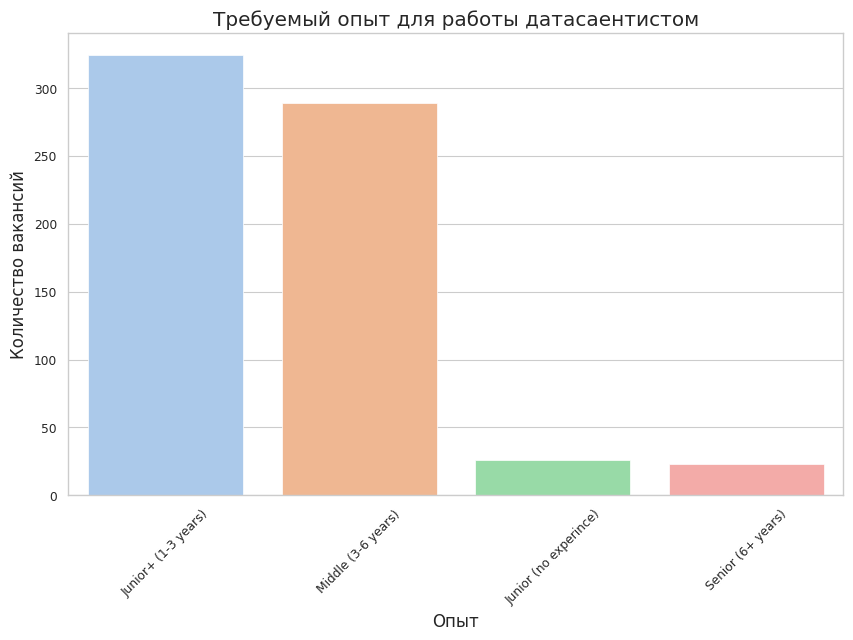

In [ ]:
sns.set_style('whitegrid')

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=da_experience.index, y='Требуемый опыт для работы датасаентистом', data=ds_experience, palette='pastel')

# Добавляем подписи к осям и заголовок
plt.xlabel('Опыт')
plt.ylabel('Количество вакансий')
plt.title('Требуемый опыт для работы датасаентистом')

# Поворачиваем подписи оси x для лучшей читаемости
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

# Отображаем график
plt.show()

In [ ]:
data_pivot = df_da.pivot_table(index=['hard_skills_from_description', 'soft_skills_from_description'], columns='experience', values='id', aggfunc='count').reset_index()
data_pivot

experience,hard_skills_from_description,soft_skills_from_description,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,Pandas,Аналитическое мышление,NaN,1.0,NaN,NaN
1,Pandas,Деловая коммуникация,NaN,1.0,NaN,NaN
2,Pandas,Документация,NaN,3.0,NaN,NaN
3,Pandas,Коммуникация,1.0,3.0,NaN,NaN
4,Pandas,"Коммуникация, Документация",NaN,1.0,1.0,NaN
5,Pandas,"Коммуникация, Документация, Аналитическое мышл...",NaN,1.0,NaN,NaN
6,Pandas,"Проактивность, Аналитическое мышление",NaN,1.0,NaN,NaN
7,"Pandas, confluence",Аналитическое мышление,NaN,1.0,NaN,NaN
8,"Pandas, confluence",Документация,NaN,1.0,NaN,1.0
9,"Pandas, confluence","Коммуникация, Документация",NaN,1.0,1.0,NaN


In [ ]:
data_pivot = df_ds.pivot_table(index=['hard_skills_from_description', 'soft_skills_from_description'], columns='experience', values='id', aggfunc='count').reset_index()
data_pivot

experience,hard_skills_from_description,soft_skills_from_description,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,ML,Коммуникация,NaN,NaN,2.0,NaN
1,"Machine Learning, Python",Документация,NaN,NaN,2.0,NaN
2,"Machine Learning, Python",Коммуникация,NaN,NaN,2.0,NaN
3,"Machine Learning, Python, SQL",Документация,NaN,1.0,NaN,NaN
4,"Machine Learning, Python, SQL",Коммуникация,NaN,2.0,NaN,NaN
5,"Machine Learning, Python, SQL, ML",Коммуникация,NaN,NaN,1.0,NaN
6,Pandas,Аналитическое мышление,NaN,1.0,1.0,NaN
7,Pandas,Документация,NaN,14.0,19.0,2.0
8,Pandas,"Документация, Аналитическое мышление",NaN,2.0,2.0,NaN
9,Pandas,Коммуникация,NaN,2.0,11.0,NaN


In [ ]:
df_da_skills = df_da.groupby(['experience', 'hard_skills_from_description','soft_skills_from_description']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
df_da_skills

,experience,hard_skills_from_description,soft_skills_from_description,id
0,Middle (3-6 years),confluence,Документация,5
1,Junior+ (1-3 years),Pandas,Документация,3
2,Junior+ (1-3 years),Pandas,Коммуникация,3
3,Middle (3-6 years),confluence,"Коммуникация, Документация",3
4,Middle (3-6 years),"SQL, Python","Коммуникация, Документация, Переговоры",2
5,Junior+ (1-3 years),"SQL, Python",Коммуникация,2
6,Junior+ (1-3 years),SQL,Документация,2
7,Junior+ (1-3 years),SQL,"Документация, Переговоры",2
8,Junior+ (1-3 years),SQL,"Работа в команде, Грамотная речь и письмо",2
9,Junior (no experince),Pandas,Коммуникация,1


In [ ]:
df_ds_skills = df_ds.groupby(['experience', 'hard_skills_from_description','soft_skills_from_description']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
df_ds_skills

,experience,hard_skills_from_description,soft_skills_from_description,id
0,Middle (3-6 years),Pandas,Документация,19
1,Junior+ (1-3 years),Pandas,Документация,14
2,Middle (3-6 years),Pandas,Коммуникация,11
3,Junior+ (1-3 years),SQL,"Планирование карьеры, Работа в команде",6
4,Middle (3-6 years),Python,Документация,5
...,...,...,...,...
69,Junior+ (1-3 years),confluence,"Коммуникация, Документация, Креативность",1
70,Junior (no experince),"Pandas, confluence",Документация,1
71,Middle (3-6 years),Pandas,Аналитическое мышление,1
72,Middle (3-6 years),Pandas,Проактивность,1


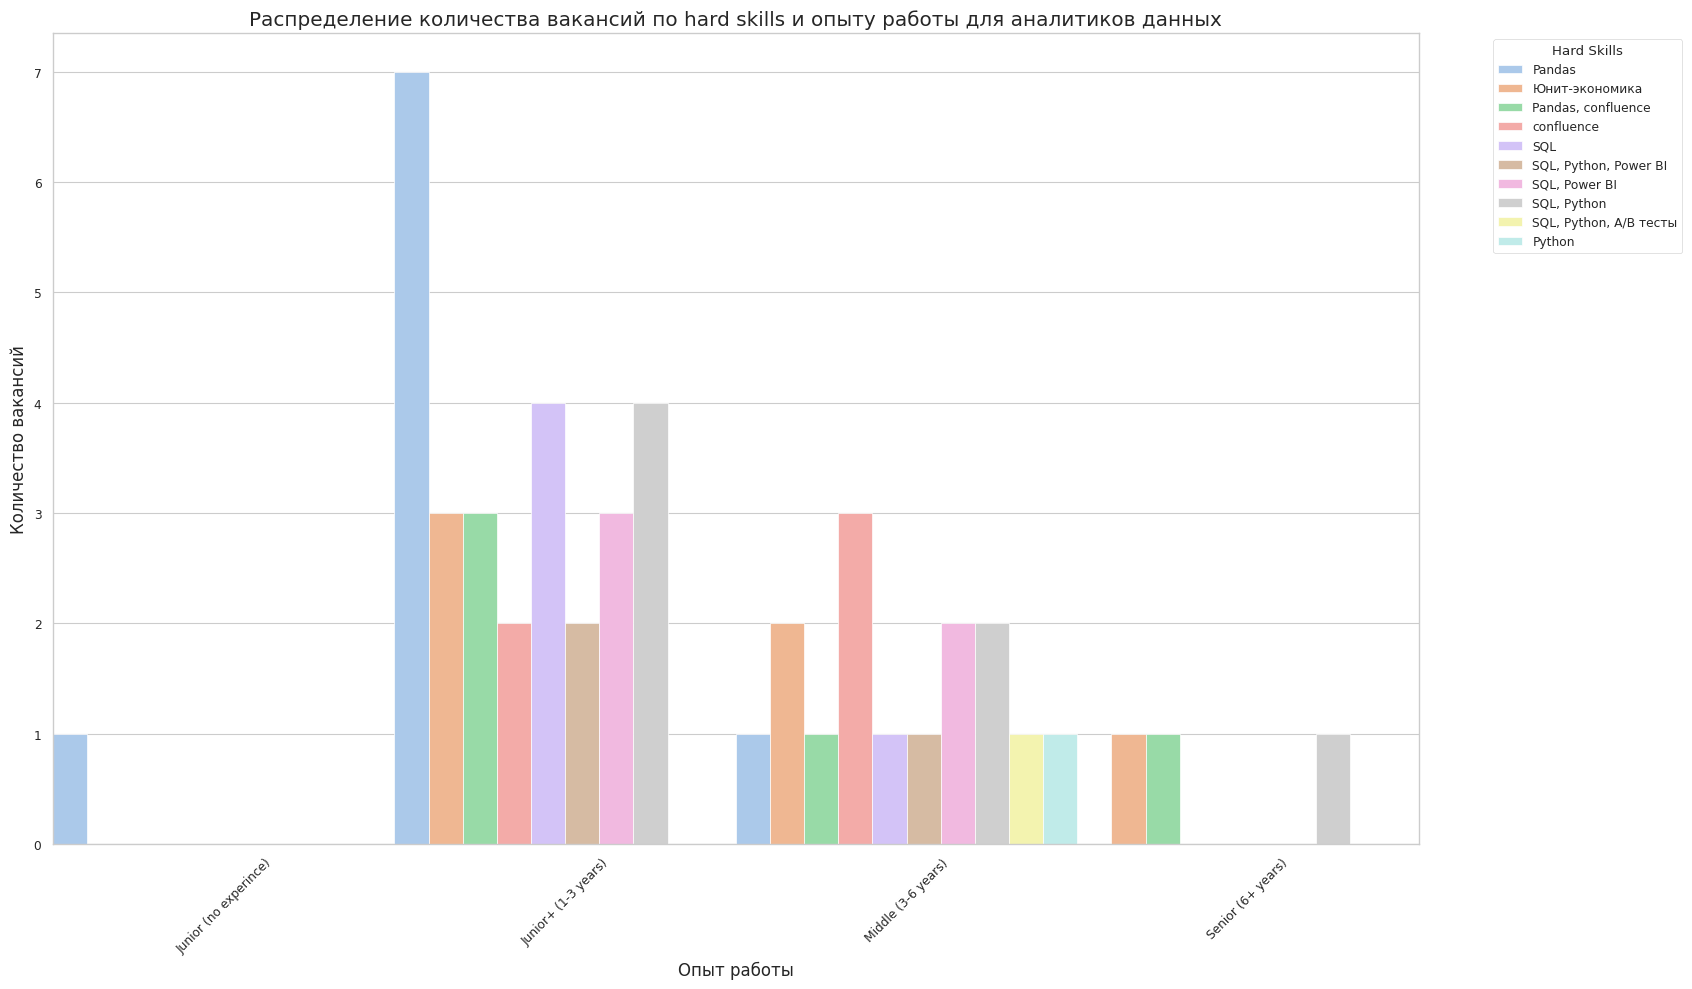

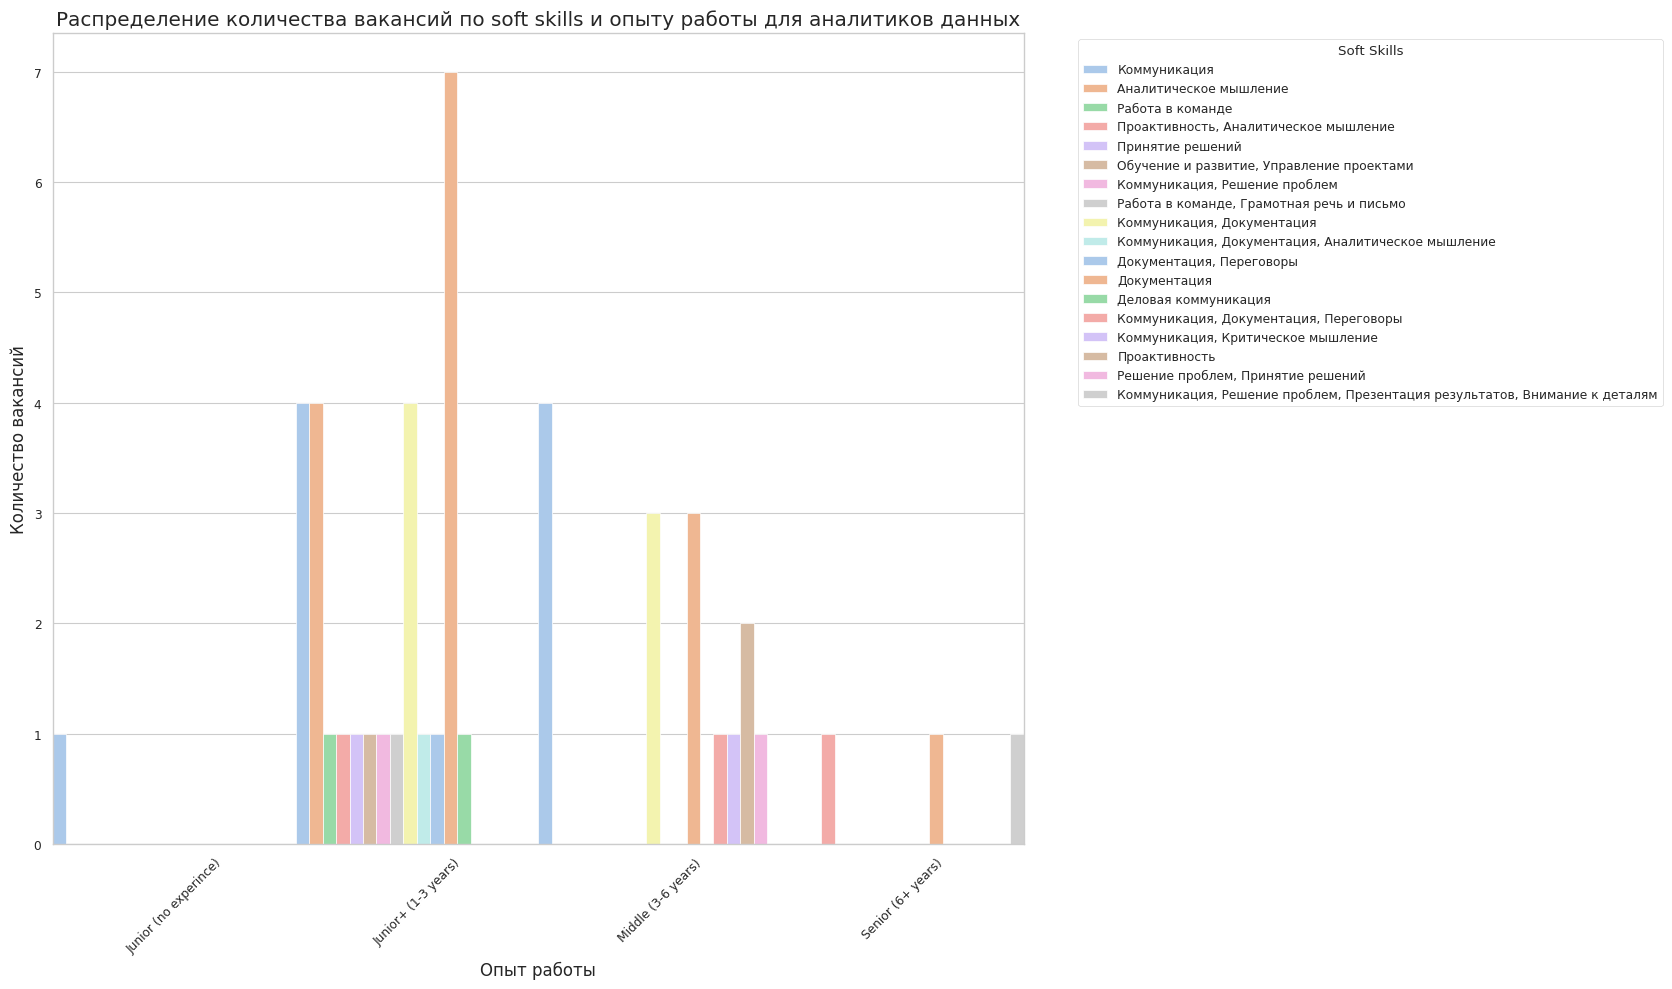

In [ ]:
df_da_grouped_hard = df_da_skills.groupby(['hard_skills_from_description', 'experience']).size().reset_index(name='count')
df_da_grouped_soft = df_da_skills.groupby(['soft_skills_from_description', 'experience']).size().reset_index(name='count')

# Сначала сортируем данные по опыту работы
df_da_grouped_hard_sorted = df_da_grouped_hard.sort_values('experience')

# Теперь создаем график, где ось X будет отражать опыт работы
plt.figure(figsize=(17, 10))
sns.barplot(x='experience', y='count', data=df_da_grouped_hard_sorted, hue='hard_skills_from_description', dodge=True, palette='pastel', width=1)
plt.title('Распределение количества вакансий по hard skills и опыту работы для аналитиков данных')
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45) # Поворачиваем названия грейдов для лучшей читаемости
plt.legend(title='Hard Skills', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

# Сначала сортируем данные по опыту работы
df_da_grouped_soft_sorted = df_da_grouped_soft.sort_values('experience')

# Теперь создаем график, где ось X будет отражать опыт работы
plt.figure(figsize=(17, 10))
sns.barplot(x='experience', y='count', data=df_da_grouped_soft_sorted, hue='soft_skills_from_description', dodge=True, palette='pastel', width=1)
plt.title('Распределение количества вакансий по soft skills и опыту работы для аналитиков данных')
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45) # Поворачиваем названия грейдов для лучшей читаемости
plt.legend(title='Soft Skills', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

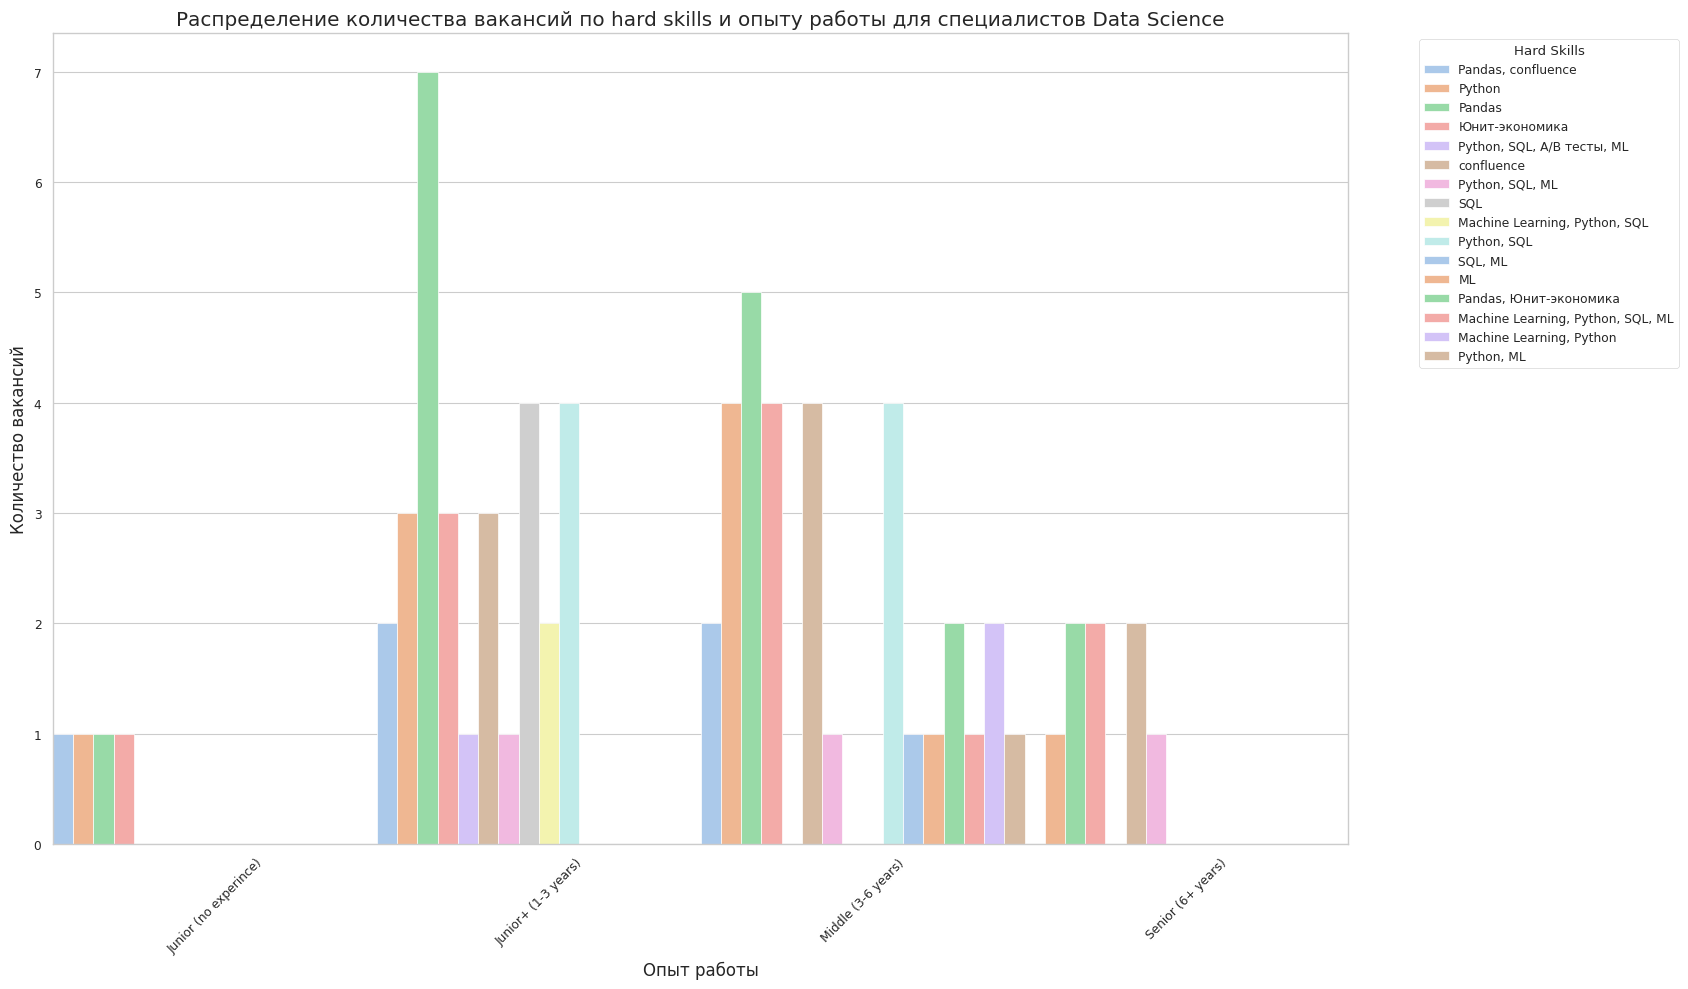

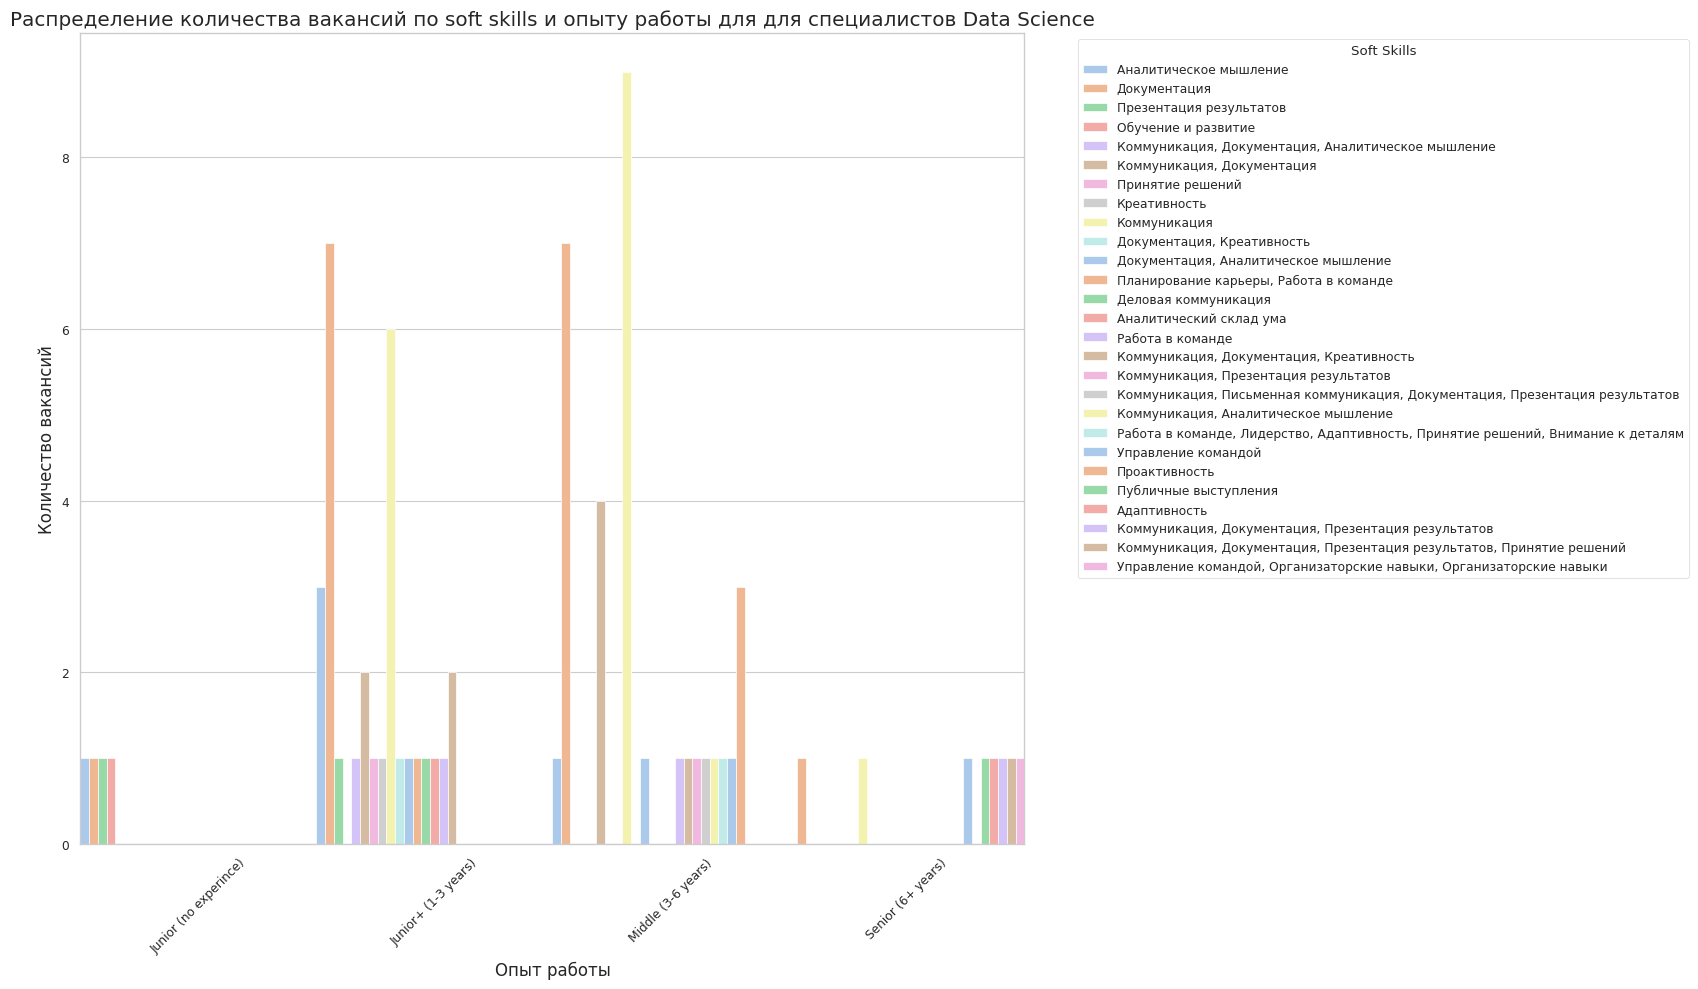

In [ ]:
df_ds_grouped_hard = df_ds_skills.groupby(['hard_skills_from_description', 'experience']).size().reset_index(name='count')
df_ds_grouped_soft = df_ds_skills.groupby(['soft_skills_from_description', 'experience']).size().reset_index(name='count')

# Сначала сортируем данные по опыту работы
df_ds_grouped_hard_sorted = df_ds_grouped_hard.sort_values('experience')

# Теперь создаем график, где ось X будет отражать опыт работы
plt.figure(figsize=(17, 10))
sns.barplot(x='experience', y='count', data=df_ds_grouped_hard_sorted, hue='hard_skills_from_description', dodge=True, palette='pastel', width=1)
plt.title('Распределение количества вакансий по hard skills и опыту работы для специалистов Data Science')
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45) # Поворачиваем названия грейдов для лучшей читаемости
plt.legend(title='Hard Skills', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

# Сначала сортируем данные по опыту работы
df_ds_grouped_soft_sorted = df_ds_grouped_soft.sort_values('experience')

# Теперь создаем график, где ось X будет отражать опыт работы
plt.figure(figsize=(17, 10))
sns.barplot(x='experience', y='count', data=df_ds_grouped_soft_sorted, hue='soft_skills_from_description', dodge=True, palette='pastel', width=1)
plt.title('Распределение количества вакансий по soft skills и опыту работы для для специалистов Data Science')
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45) # Поворачиваем названия грейдов для лучшей читаемости
plt.legend(title='Soft Skills', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

**Наиболее желаемые кандидаты на вакансии Аналитик данных**:

Наиболее указаываемые hard skills для аналитиков данных являются в общем и целом: Pandas, SQL, confluence, Python, Power BI
Наиболее указаываемые soft skills для аналитиков данных являются в общем и целом: Документация, Коммуникация, Переговоры, работа в команде

*Для Junior (no experince) hard skills:* Pandas

*Для Junior (no experince) soft skills:* Коммуникация

*Junior+ (1-3 years) hard skills:* Pandas, confluence, SQL

*Junior+ (1-3 years) soft skills:* Аналитическое мышление, деловая коммуникация, документация,переговоры, коммуникация, решение проблем, работа в команде, проактивность, грамотная речь и письмо

*Middle (3-6 years) hard skills:* confluence, Юнит-экономика, SQL, Python, Power BI

*Middle (3-6 years) soft skills:* Коммуникация, Документация, проактивность, переговоры, решение проблем и принятие решений

*Senior (6+ years) hard skills:* Pandas, SQL, Python, Юнит-экономика

*Senior (6+ years) soft skills:* Документация, внимание к деталям, подготовка результатов, проактивность, аналитическое мышление

Так как больше вакансий по грейду Junior+ (1-3 years) по аналитикам данных, большое количество навыков распределено именно на эту часть.

**Наиболее желаемые кандидаты на вакансии Специалист по Data Science**:

Наиболее указаываемые hard skills для датасаентистов являются: ML(Machine learning), SQL, confluence, Python

Наиболее указаываемые soft skills для датасаентистов являются: Документация, Коммуникация, Переговоры, аналитическое мышление

*Для Junior (no experince) hard skills:* Pandas, confluence, Python, юнит-экономика

*Для Junior (no experince) soft skills:* Аналитическое мышление, документация, обучение и развитие, презентация результатов

*Junior+ (1-3 years) hard skills:* Pandas, SQL, Python, confluence, юнит-экономика

*Junior+ (1-3 years) soft skills:* Документация, коммуникация, аналитическое мышление, планирование, работа в команде, креативность, принятие решений

*Middle (3-6 years) hard skills:* ML(Machine learning), Pandas, confluence, Python, юнит-экономика

*Middle (3-6 years) soft skills:* Коммуникация, документация, проактивность, креативность, презентация результатов, принятие решений, управление командой, внимание к деталям, организаторские навыки

*Senior (6+ years) hard skills:* Pandas, confluence, юнит-экономика, Python, ML, SQL

*Senior (6+ years) soft skills:* Адаптивность, документация, коммуникация, креативность, презентация результатов,проактивность, принятие решений, управление командой, организаторские навыки, публичные выступления

Так как больше вакансий по грейду *Middle (3-6 years) по специалистам по Data Science, большое количество навыков распределено именно на эту часть.

Выводы:

***По первому шагу проведена работа:***

- Поработали с пропусками по мере возможности, во-первых в столбцах salary_to, salary_from самый большой процент пропусков, возможно это связано с тем, что работодатели не заполняют информацию о заработной плате, пропуски в данных столбцах оставим так как есть, потому что это может искажать данные в целом (если заполнять пропуски медианным значением либо средним). Столбец department так же оставим без заполнения, потому что для него у нас не хватает данных, чтобы исключить пропуски.

- С помощью функции в столбцах soft_skills_from_description, hard_skills_from_description снизили процент пропусков с 72% до 70% и с 64% до 31% соответственно по DA. По DS: SS - c 71% до 68%, HS - 53% о 27%. Не во всех описаниях вакансий есть упоминание о soft skills, поэтому заполнение по ним труднее. На данном этапе, заполнили пропуски насколько это представляется возможным.

***По шагу 2:***

- По полученным данным можно сказать, что первое место по количеству предлагаемых вакансий среди аналитиков данных и датасаентистам занимает СБЕР. Возможно это связано с расширением сфер деятельности, и расширением штатных единиц. Сбербанк имеет обширную сеть отделений по всей стране, что требует большого количества сотрудников для обеспечения их работы. А также, Сбербанк активно инвестирует в цифровые технологии и развитие новых продуктов, что создает дополнительные рабочие места в сфере IT и цифрового бизнеса. Сбербанк постоянно расширяет спектр своих услуг, включая страхование, инвестиции и технологические сервисы, что также требует новых специалистов.
Далее по аналтиткам данных расположились такие компании как Wildberries и МТС. Тенденция для датасаентистов поменялась, на втором месте так же, как и для DA маркетплейс, но Ozon, на третьем Газпромбанк. Возможно это связано с тем, как компании хотят улучшить свои процессы.

Определяем типичное место работы для **Аналитика данных**:
1. **Junior (no experince)**:

Место работы: СБЕР

---
ЗП: Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

---
Тип занятости: полная занятость

---
График работы: полный день

2. **Junior+ (1-3 years)**:
Место работы: СБЕР, ПСБ (ПАО «Промсвязьбанк»), Магнит (Розничная сеть), Центр финансовых технологий


---
ЗП: Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

---
Тип занятости: полная занятость

---
График работы: полный день, есть вакансии с удаленной работой

3. **Middle (3-6 years)**:
Место работы: СБЕР, Wildberries,«UZUM TECHNOLOGIES».

---
ЗП: Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

---
Тип занятости: полная занятость

---
График работы: полный день, есть вакансии с удаленной работой

4. **Senior (6+ years)**:
Место работы: Нет данных по компаниям для аналитиков данных по данному грейду
---
ЗП: Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

---
Тип занятости: полная занятость

---
График работы: полный день

---

Определяем типичное место работы для **Специалиста по Data Science**:
1. **Junior (no experince)**:

Место работы: СБЕР, Ozon, Lamoda Tech

---
ЗП: Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

---
Тип занятости: полная занятость

---
График работы: полный день

2. **Junior+ (1-3 years)**:

Место работы: Ростелеком,1221Системс, ПКБ

---
ЗП: Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

---
Тип занятости: полная занятость

---
График работы: полный день, есть вакансии с удаленной работой

3. **Middle (3-6 years)**:

Место работы: СБЕР, Газпромбанк, Wildberries

---
ЗП: Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

---
Тип занятости: полная занятость

---
График работы: полный день, есть вакансии с удаленной работой

4. **Senior (6+ years)**:

Место работы: СБЕР

---
ЗП: Не хватает полных данных, чтобы судить о зарплатной вилки для разных грейдов по аналитикам данных и датасаентистам. Так как работодатель предпочитает не заполнять данные о ЗП.

---
Тип занятости: полная занятость

---
График работы: полный день






Ссылка на презентацию: https://drive.google.com/file/d/1cmfHr4OHcrg0PS7OnAEmmRQA0XdYITrN/view?usp=sharing